# READY TO BE DISCHARGED: EXAMINING HOSPITAL READMISSIONS

<div class="alert alert-block alert-info">

[1. Objectives](#1)<br>

[2. Import Data/Libraries](#2)<br>
- [2.1 Import Libraries](#3)<br>
- [2.2 Import Data](#4)<br>
 
[3. Data Exploration, Cleaning, and Preprocessing](#5)<br>
- [3.1 Data Exploration and Cleaning](#6)<br>
    - [3.1.1 encounter_id](#7)<br>
    - [3.1.2 country](#8)<br> 
    - [3.1.3 race](#9)<br> 
    - [3.1.4 gender](#10)<br> 
    - [3.1.5 age](#11)<br> 
    - [3.1.6 weight](#12)<br> 
    - [3.1.7 payer_code](#13)<br> 
    - [3.1.8 visits_in_previous_year](#14)<br> 
    - [3.1.9 admission_type](#15)<br> 
    - [3.1.10 medical_specialty](#16)<br>
    - [3.1.11 average_pulse_bpm](#17)<br>
    - [3.1.12 discharge_disposition](#18)<br>
    - [3.1.13 admission_source](#19)<br>
    - [3.1.14 length_of_stay_in_hospital](#20)<br>
    - [3.1.15 number_lab_tests](#21)<br>
    - [3.1.16 non_lab_procedures](#22)<br>
    - [3.1.17 number_of_medications](#23)<br>
    - [3.1.18 diagnoses](#24)<br>
    - [3.1.19 number_diagnoses](#25)<br>
    - [3.1.20 test results](#26)<br>
    - [3.1.21 change_in_meds_during_hospitalization and prescribed_diabetes_meds](#27)<br>
    - [3.1.22 medication](#28)<br>
    - [3.1.23 readmitted_binary](#29)<br>
    - [3.1.24 readmitted_multiclass](#30)<br>
    - [3.1.25 patient_id and dependent observations](#31)<br>
- [3.2 Preprocessing](#32)<br>

[4. Transformations and Nan Imputing](#33)<br>

[5. Feature Selection](#34)<br>
- [5.1 Statistical Methods](#35)<br>
- [5.2 Lasso](#36)<br>
- [5.3 Decision Tree](#37)<br>
- [5.4 Unanimus Voting](#38)<br>

[6. Model Selection for Binary Classification](#39)<br>
- [6.1 Linear Models](#40)<br>
    - [6.1.1 Logistic Regression](#41)<br>
    - [6.1.2 Stocastic Gradient Descent Classifier](#42)<br>
- [6.2 Decision Tree](#43)<br>
- [6.3 Naive Bayes](#44)<br>
- [6.4 Neural Networks](#45)<br>
- [6.5 Ensemble Methods](#46)<br>
- [6.6 Smote and Random Over-Sampling](#47)<br>

[7. Kaggle Tournament Submission](#48)<br>

[8. Model Selection for Multiclass Classification](#49)<br>
- [8.1 Linear Models](#50)<br>
    - [8.1.1 Logistic Regression](#51)<br>
    - [8.1.2 Stocastic Gradient Descent Classifier](#52)<br>
- [8.2 Decision Tree](#53)<br>
- [8.3 Random Forest](#54)<br>
- [8.4 Histogram Gradient Boost](#55)<br>
- [8.5 Smote and Random Over-Sampling](#56)<br>
</div>

<div class="alert alert-block alert-success">

## 1. Objectives <a class="anchor" id="1"></a>    
</div>

We are working with a dataset that focuses on hospital readmissions of diabetic patients. The 
contribute of these readmissions to escalating costs in hospitals is significant, and 
predicting these can help decrease costs and provide better patient care.

The main objective of this project is to perform predictive modeling on hospital readmissions 
based on the hospital visits of diabetic patients.\
For each encounter we are given attributes 
regarding the patient's state, information gathered during the encounter, and the actions taken 
during hospitalization, together with targets which show if the patient was readmitted and the 
readmission time-frame.

We'll work on two distinct problems:
- **Binary Classification:** predict if a patient will be readmitted to the hospital 
within 30 days of being discharged;
- **Multiclass Classification:** predict the timeframe of a patient’s readmission, with the 
classes being “No”, “<30 days”, “>30 days”.

And have the respective target variables:
- **readmitted_binary**: describing if the the patient is readmitted to the hospital within 30 
days of being discharged;
-  **readmitted_multiclass**: carrying information regarding the timeframe of the patient's 
readmission, with classes "No", "<30 days", and ">30 days".

<div class="alert alert-block alert-success">

## 2. Import Data/Libraries <a class="anchor" id="2"></a>
    

    
</div>

<a class="anchor" id="3">

### 2.1. Import Libraries
    
</a>

In [1]:
from warnings import filterwarnings
import os
import re
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,rankdata
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import chi2,f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso,LogisticRegression,SGDClassifier
from sklearn.metrics import f1_score,confusion_matrix,balanced_accuracy_score,fbeta_score
from sklearn.metrics import matthews_corrcoef,precision_score,recall_score,roc_auc_score
from sklearn.naive_bayes import BernoulliNB,CategoricalNB,ComplementNB,MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from imblearn.over_sampling import SMOTE,RandomOverSampler
from copy import deepcopy

In [2]:
filterwarnings("ignore")

In [3]:
palette=['#0091E4','#f67c41',"#50e991","#00bfa0"]
sns.set_theme(context='notebook',style='ticks',palette=palette)

Even after setting all the seeds and random_states in the instantiated objects, setting 
global library seeds, and the python hash seed, our notebook still has some reproducability 
issues which we cannot find its source. We believe that it comes from floating point operations 
in the log transforms which we apply to some variables. The variations between reruns are very 
small.

In [4]:
os.environ['PYTHONHASHSEED']=str("0")
random.seed(0)
np.random.seed(0)

---

<a class="anchor" id="4">

### 2.2. Import Data
    
</a>

In [5]:
training_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

<div class="alert alert-block alert-success">

<a class="anchor" id="5">    </a>
## 3. Data Exploration, Cleaning, and Preprocessing
    

    
</div>

---
<a class="anchor" id="6">

### 3.1. Data Exploration and Cleaning
    
</a>

A run-down of all the features' main information:

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

---

<a class="anchor" id="7">

#### 3.1.1 encounter_id

<a>

Initially, we verify if there are any duplicated `encounter_id` observations.

In [7]:
training_data["encounter_id"].duplicated().any()

False

So, we can uniquely identify each encounter by setting the `encounter_id` column as the 
`DataFrame`'s  index.

In [8]:
training_data.set_index("encounter_id",inplace=True)

---

<a class="anchor" id="8">

#### 3.1.2 country

<a>

In [9]:
training_data["country"].value_counts()

country
USA    71236
Name: count, dtype: int64

All fields of the `country` feature are set to `USA`. Since it is a univariate variable, it 
carries no predictive power, and we can remove it from the dataset.

In [10]:
del training_data["country"]

---
<a class="anchor" id="9">

#### 3.1.3 race
<a>

In this dataset, instances of `NaN` and `?` can carry different meanings depending 
on the particular attribute to which they belong to. Our approach to addressing this issue 
involves examining each feature individually, and interpret their meaning based on the 
attribute's descriptions.

In [11]:
training_data["race"].value_counts(dropna=False)

race
Caucasian          50693
AfricanAmerican    12693
NaN                 3554
?                   1516
Hispanic            1364
Other                995
Asian                421
Name: count, dtype: int64

It's important to note that while preprocessing the test dataset, we might encounter categories 
unobserved in the training dataset.\
In such cases, we will map these new categories onto a default value, which, for this case, 
is `other`.

For the majority of categorical features, we define a map/dictionary that specifies the 
renaming of each category.

Since this safeguard strategy has to be implemented on various features, we define a function, 
`safe_mapping`, that assigns a default value to the categories not found in the map/dictionary.

In [12]:
def safe_mapping(key,map:dict,default):
    # returns the object associated to each key in map, or 
    #    returns the default value if the key is not found
    return map.get(key,default)

In [13]:
race_map={
    "Caucasian":"cauc",
    "AfricanAmerican":"afam",
    "Hispanic":"hisp",
    "Asian":"asian"}

In [14]:
training_data["race"]=training_data["race"].map(lambda race: safe_mapping(race,
    race_map,"other")).astype("category")

In [15]:
training_data["race"].value_counts()

race
cauc     50693
afam     12693
other     6065
hisp      1364
asian      421
Name: count, dtype: int64

---

<a class="anchor" id="10">

#### 3.1.4 gender

<a>

There are only $3$ observations categorized as `Unknown/Invalid` in the `gender` feature.\
In 
this case, our approach is to assign these instances to the mode (`Female`). This decision is 
based on the assumption that the number of encounters with the patient's gender equal to 
`Unknown/Invalid` is negligible once compared to the total number of observations.

In [16]:
training_data["gender"].value_counts()

gender
Female             38228
Male               33005
Unknown/Invalid        3
Name: count, dtype: int64

In [17]:
gender_transformation=lambda gender: 0 if gender=="Male" else 1

In [18]:
training_data["gender"]=training_data["gender"].map(gender_transformation).astype("int64")

In [19]:
training_data["gender"].value_counts()

gender
1    38231
0    33005
Name: count, dtype: int64

---

<a class="anchor" id="11">

#### 3.1.5. age

<a>

The `age` variable represents the decade interval to which of our patients' age belongs to. \
We will encode each age brackets as the first digit of the leftmost age of the bracket.

In this feature there are missing values represented by `NaN`, indicating patients whose age 
is unknown.

In [20]:
training_data["age"].value_counts(dropna=False).sort_index()

age
[0-10)        105
[10-20)       474
[20-30)      1071
[30-40)      2536
[40-50)      6418
[50-60)     11423
[60-70)     14908
[70-80)     17359
[80-90)     11510
[90-100)     1875
NaN          3557
Name: count, dtype: int64

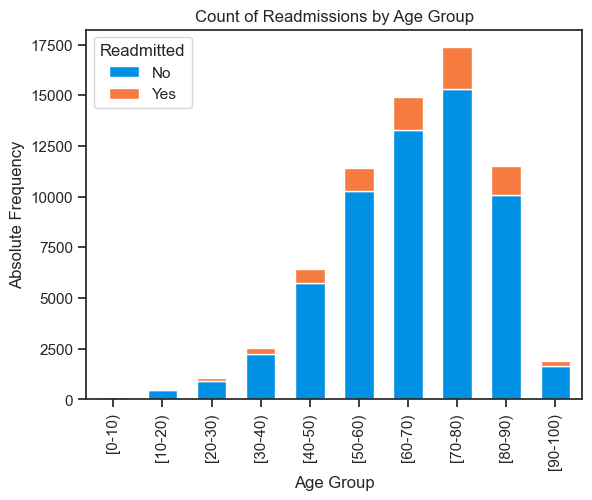

In [21]:
# create the axis and the graph
_=training_data.groupby("readmitted_binary")["age"].value_counts()\
    .unstack(level=0).sort_values(by="age",ascending=True).plot.bar(stacked=True,width=0.6)
# add context
plt.title('Count of Readmissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Absolute Frequency')
plt.legend(title='Readmitted',loc='upper left')
plt.show()

Once again, the function `age_transformation` is designed in order to ensure that any bracket 
not belonging to the observed decades set will be mapped into a `NaN`.

Within the function, we leverage the regular expression module `re` from Python's Standard 
Library. The regex pattern `(?<=[)(.*?)(?=-)` captures all characters between `[` and `-`.
By using `re.search` function, we extract the leftmost age in the interval defined by the 
bracket.

In [22]:
def age_transformation(age_bracket):
    # finds the leftmost age
    left_age=re.search(r'(?<=\[)(.*?)(?=\-)',age_bracket)[0]
    # if it is a decade, return the first digit 
    if left_age in {str(age) for age in range(0,100,10)}:
        return int(left_age[0])
    return np.nan

In [23]:
training_data["age"]=training_data["age"].map(age_transformation,
    na_action="ignore").astype("Int64")

In [24]:
training_data["age"].value_counts(dropna=False).sort_index()

age
0         105
1         474
2        1071
3        2536
4        6418
5       11423
6       14908
7       17359
8       11510
9        1875
<NA>     3557
Name: count, dtype: Int64

---

<a class="anchor" id="12">

#### 3.1.6. weight

<a>

Approximately 97% of our encounters have a missing weight. As a result, we chose to disregard 
this feature in our analysis.

Alternatively, another course of action would involve assuming that there was some medical 
reason to measure a patient's weight. In this case, we could convert this feature into a binary 
variable, taking the value of $1$ if weight was measured, and $0$ otherwise.

In [25]:
training_data["weight"].value_counts(normalize=True).round(2)

weight
?            0.97
[75-100)     0.01
[50-75)      0.01
[100-125)    0.01
[125-150)    0.00
[25-50)      0.00
[0-25)       0.00
[150-175)    0.00
[175-200)    0.00
>200         0.00
Name: proportion, dtype: float64

In [26]:
del training_data["weight"]

---

<a class="anchor" id="13">

#### 3.1.7. payer_code

<a>

In the case of the `payer_code` feature, `?` encodes patients who do not have any health 
insurance, and is considered a distinct category (`none`).

We have chosen to keep the most popular health insurances and the `none` category. The 
remaining instances will be mapped into the default `other`.

In [27]:
training_data["payer_code"].value_counts(dropna=False)

payer_code
?     28201
MC    22683
HM     4319
SP     3541
BC     3292
MD     2484
CP     1762
UN     1733
CM     1347
OG      729
PO      405
DM      378
CH      102
WC       99
OT       61
MP       54
SI       45
FR        1
Name: count, dtype: int64

In [28]:
payer_code_map={
    "?":"none",
    "MC":"mc",
    "HM":"hm",
    "SP":"sp",
    "BC":"bc",
    "MD":"md",
    "CP":"cp",
    "UN":"un",
    "CM":"cm"}

In [29]:
training_data["payer_code"]=training_data["payer_code"].map(lambda code: safe_mapping(code,
    payer_code_map,"other")).astype("category")

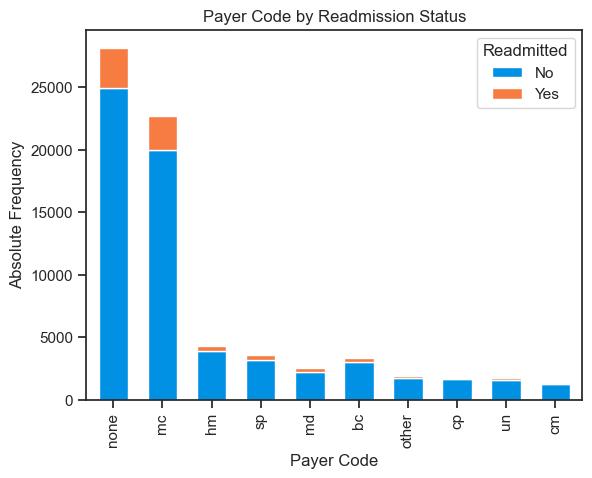

In [30]:
_=training_data.groupby("readmitted_binary")["payer_code"].value_counts()\
    .unstack(level=0).sort_values(by='Yes',ascending=False).plot.bar(stacked=True,width=0.6)
plt.title('Payer Code by Readmission Status')
plt.xlabel('Payer Code')
plt.ylabel('Absolute Frequency')
plt.legend(title ='Readmitted')
plt.show()


---

<a class="anchor" id="14">

#### 3.1.8. visits_in_previous_year

<a>

`outpatient_visits_in_previous_year`, `emergency_visits_in_previous_year`, and 
`inpatient_visits_in_previous_year` are discrete numerical features.

Assuming that these features are exclusive, meaning that each visit can only be classified as 
'outpatient', 'emergency' or 'inpatient', we can create a new feature called 
`total_visits_in_previous_year`, which is the sum of the number of the three 
exclusive kinds of visits.

In [31]:
training_data['total_visits_in_previous_year']=\
    training_data['outpatient_visits_in_previous_year']+\
    training_data['inpatient_visits_in_previous_year']+\
    training_data['emergency_visits_in_previous_year']

These $4$ features follow long tail distributions. Consider the case of 
`total_visits_previous_year`:

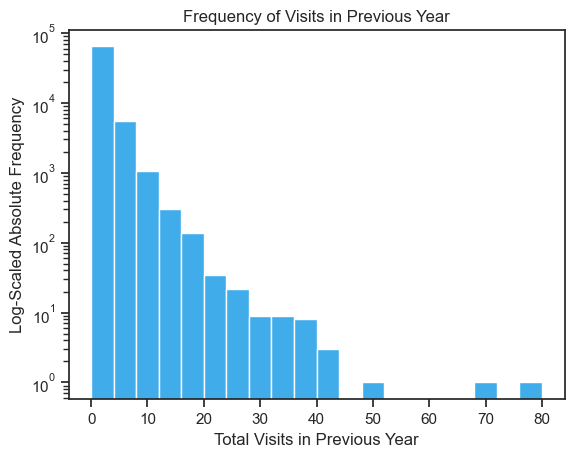

In [32]:
sns.histplot(data = training_data, x = 'total_visits_in_previous_year', binwidth=4)
plt.yscale('log')
plt.xlabel('Total Visits in Previous Year')
plt.ylabel('Log-Scaled Absolute Frequency')
plt.title('Frequency of Visits in Previous Year')
plt.show()

There is at least one patient who has visited the hospital $80$ times in the previous year!

In [33]:
training_data["total_visits_in_previous_year"].max()

80

Because of this long tail behaviour, it might be a good idea to log transform these feature 
before training models. 

We want to be able to perform this log transformation inside the models' pipelines. \
So, we 
create a `LogTransformer` class that behaves in a similar manner to a `sklearn`'s transformer.

Throughout this project, we found useful to create classes necessary for specific tasks. \
The integration of all of these objects' instances into a single interdependent system improved 
workflow and efficiency in the train, validation and test of predicative models. \
These classes where purely build to work with the data at hand, and their do not contain any 
type of robustness and input validation.

In [34]:
class LogTransformer():
    def __init__(self,feature_names_in,log_base=10):
        # name of the feature which are to be log transformed
        self.feature_names_in=feature_names_in
        # the logarithmic base
        self.log_base=log_base
    def transform(self,X:pd.DataFrame):
        for feature in self.feature_names_in:
            # apply the transformation
            X.loc[:,feature]=np.emath.logn(self.log_base,(X.loc[:,feature]+1))
        return X

`LogTransformer` applies the transformation $log_n(x+1)$ to each feature in `feature_names_in`.

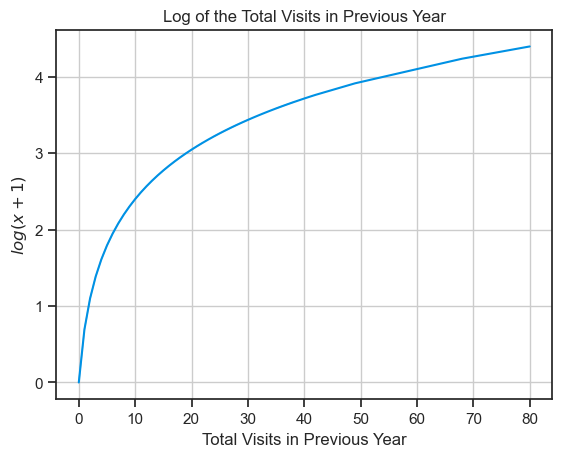

In [35]:
log_total = np.log(training_data['total_visits_in_previous_year']+1)
sns.lineplot(x=training_data['total_visits_in_previous_year'],y=log_total)
plt.xlabel('Total Visits in Previous Year')
plt.ylabel(r'$log(x+1)$')
plt.title('Log of the Total Visits in Previous Year')
plt.grid()
plt.show()

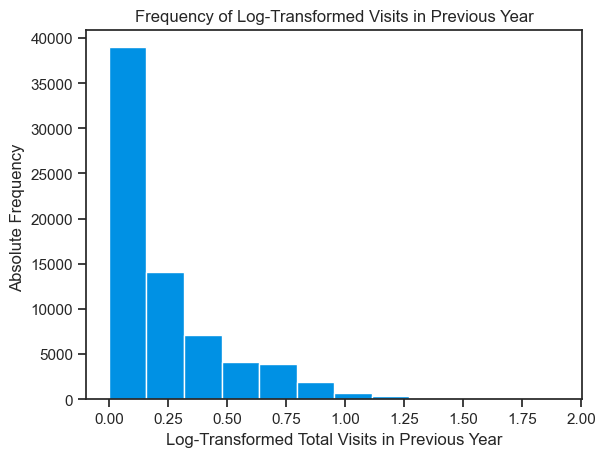

In [36]:
_=LogTransformer(["total_visits_in_previous_year"]).transform(\
    training_data["total_visits_in_previous_year"].to_frame()).plot.hist(bins=12,legend=None)
plt.xlabel('Log-Transformed Total Visits in Previous Year')
plt.ylabel('Absolute Frequency ')
plt.title('Frequency of Log-Transformed Visits in Previous Year')
plt.show()

We can readily see the effects of the transformation in the distribution of 
`total_visits_in_previous_year` by looking at the random variable's moments. The kurtosis, 
which is a rough measure of the long-tailness of the distribution, dimished considerably. The 
removal of the long-tail behaviour also affects the remaining moments by proxy.

In [37]:
def distribution_moments(series):
    # return a list of the first four moments of a pd.Series instance
    return [series.mean(),series.std(),series.skew(),series.kurtosis()]

In [38]:
pd.DataFrame({
    "before":distribution_moments(training_data["total_visits_in_previous_year"]),
    "after":distribution_moments(training_data["total_visits_in_previous_year"]\
        .map(lambda x: np.log(x+1)))},
    index=["mean","std","skewness","kurtosis"])

,before,after
mean,1.205991,0.516006
std,2.295259,0.662862
skewness,5.266438,1.113410
kurtosis,65.682562,0.537146


We might also want to move the upper percentile outliers closer the distribution. To do so we 
wrote a `QuantileFilter` which overwrites all the values of the outliers which are above a 
specific percentage by the corresponding percentile.

In [39]:
class QuantileFilter():
    def __init__(self,percentage,feature_names_in):
        self.percentage=percentage
        # names of the features in which to apply the filter
        self.feature_names_in=feature_names_in
    def fit(self,X:pd.DataFrame):
        # find the associated percentile for each feature, 
        # and save it in the limit dictionary
        self.limit={}
        for feature in self.feature_names_in:
            self.limit[feature]=np.quantile(X[feature],1-self.percentage)
    def transform(self,X:pd.DataFrame):
        for feature in self.feature_names_in:
            limit=self.limit[feature]
            # for every field which goes over the defined limiting percentile
            # overwrite its value by the percentile itself
            X.loc[:,feature]=X[feature].map(lambda value: limit if value>limit else value)
        return X
    def fit_transform(self,X:pd.DataFrame):
        self.fit(X)
        return self.transform(X)

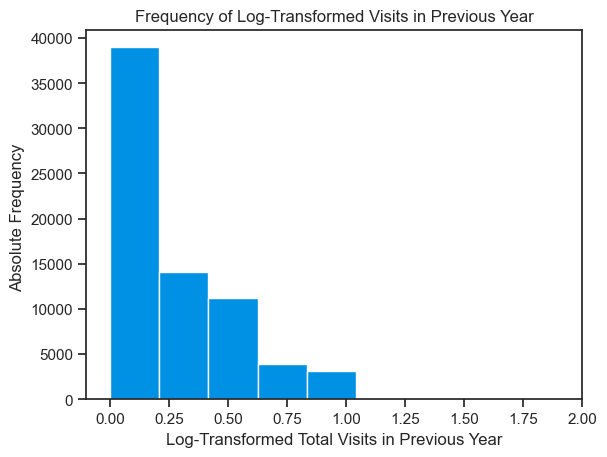

In [40]:
_=QuantileFilter(0.01,["total_visits_in_previous_year"]).fit_transform(
    LogTransformer(["total_visits_in_previous_year"]).transform(\
    training_data["total_visits_in_previous_year"].to_frame())).plot.hist(bins=5,legend=None)
plt.xlim((-0.1,2.0))
plt.xlabel('Log-Transformed Total Visits in Previous Year')
plt.ylabel('Absolute Frequency ')
plt.title('Frequency of Log-Transformed Visits in Previous Year')
plt.show()

---

<a class="anchor" id="15">

#### 3.1.9. admission_type
    
</a>

Encounters with `admission_type` set to `Newborn` or `Trauma Center` never get readmitted 
in the training dataset. In these particular cases, a possible course of action would be to take 
a Bayesian approach and say that, we have no evidence that such patients ever get readmitted. 
And so, since belonging to the `Newborn` or `Trauma Center` completely defines the outcome of 
the encounter as non-readmitted, there would be no need to train with them. \
**We will not take 
this approach**, since there is no causal relation between an `admisssion_type` being `Newborn` 
or `Trauma Center`, and the patient being readmitted. Unlike, for example, the case where the 
patient expires during hospitalization.

We will deal with `admission_type` in the same way we have dealt with other categorical 
variables. In this case, the categories `Not Available`, `Not Mapped`, `Trauma Center`, and 
`Newborn` together with any other unkown category that might appear in the test dataset will 
be mapped onto an `other` category.

In [41]:
training_data["admission_type"].value_counts()

admission_type
Emergency        37742
Elective         13211
Urgent           13024
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: count, dtype: int64

We have also grouped `Emergency` and `Urgent` into the same admission type, while 
originally they are separate categories. An argument in favor of this decision, although 
rather weak and fragile, since the behaviour of the other features might be completely 
different between observations having belonging to these two categories, is that the 
readmittion proportion of both categories is approximatelly identical.

In [42]:
training_data.groupby("admission_type")["readmitted_binary"]\
    .value_counts(normalize=True).unstack(level=0)[["Emergency","Urgent"]]

admission_type,Emergency,Urgent
readmitted_binary,,
No,0.885062,0.887899
Yes,0.114938,0.112101


In [43]:
admission_type_map={
    "Elective":"elec",
    "Emergency":"emerg",
    "Urgent":"emerg"}

In [44]:
training_data["admission_type"]=training_data["admission_type"].map(lambda type: \
    safe_mapping(type,admission_type_map,"other")).astype("category")

---

<a class="anchor" id="16">

#### 3.1.10. medical_specialty
    
</a>

For the case of `medical_specialty`, we select the $11$ most common categories as the ones to be 
mapped and all other categories, together with any other unknown category that might appear in 
the test dataset will be mapped onto an `other` category.

Notice that a large number of entries containing `?`. Those will be encoded into the 
`unknown`category together with entries which have the value `PhysicianNotFound`. \
Out of the chosen $11$ most common categories, $10$ are known and have an interpretable value, 
and $1$ the `unknown` category.

In [45]:
len(training_data["medical_specialty"].unique())

69

In [46]:
training_data["medical_specialty"].value_counts().head(11)

medical_specialty
?                             34922
InternalMedicine              10292
Emergency/Trauma               5319
Family/GeneralPractice         5217
Cardiology                     3716
Surgery-General                2144
Nephrology                     1136
Orthopedics                     954
Orthopedics-Reconstructive      867
Radiologist                     817
Pulmonology                     611
Name: count, dtype: int64

In [47]:
medical_specialty_map={
    "?":"unknown",
    "PhysicianNotFound":"unknown",
    "InternalMedicine":"int",
    "Emergency/Truama":"emerg",
    "Family/GeneralPractice":"gen",
    "Cardiology":"card",
    "Surgery-General":"surg",
    "Nephrology":"neph",
    "Orthopedics":"ortho",
    "Orthopedics-Reconstructive":"ortho",
    "Radiologist":"radio",
    "Pulmonology":"pulm"}

In [48]:
training_data["medical_specialty"]=training_data["medical_specialty"].map(lambda spec: \
    safe_mapping(spec,medical_specialty_map,"other")).astype("category")

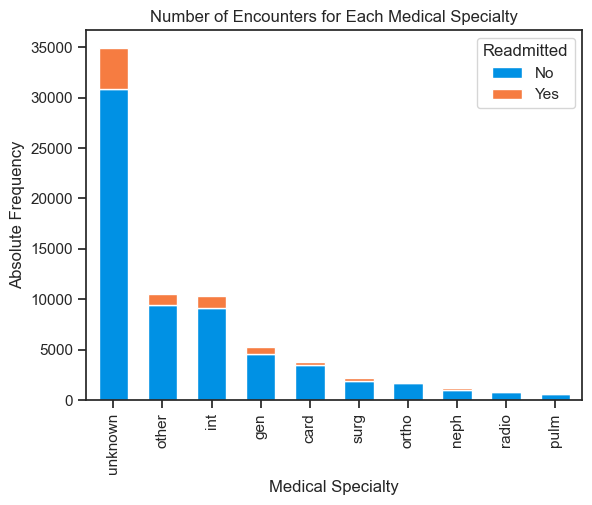

In [49]:
_=training_data.groupby("readmitted_binary")["medical_specialty"].value_counts()\
    .unstack(level=0).sort_values(by="No",ascending=False).plot.bar(stacked=True,width=0.6)
plt.title('Number of Encounters for Each Medical Specialty')
plt.xlabel('Medical Specialty')
plt.ylabel('Absolute Frequency')
plt.legend(title ='Readmitted')
plt.show()

---

<a class="anchor" id="17">

#### 3.1.11. average_pulse_bpm
    
</a>

`average_pulse_bpm` takes evenly distributed integer values and, according to the bar chart the 
ratio between readmitted and non-readmitted patients does not vary according to the value 
`average_pulse_bpm` takes. On its own `average_pulse_bpm` carries little to no predicative 
power, and is the frontrunner to be removed in the feature selection phase.

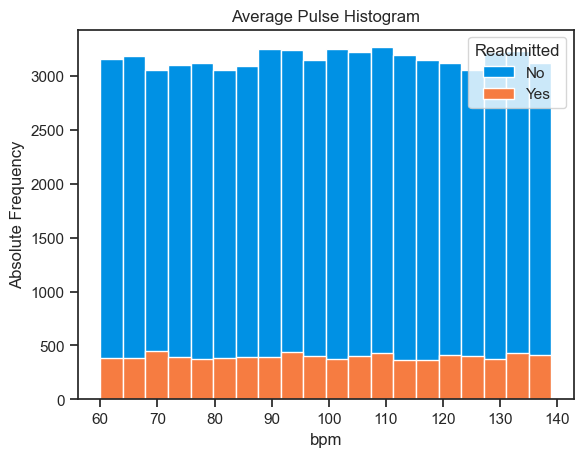

In [50]:
_=training_data.groupby("readmitted_binary")["average_pulse_bpm"].plot.hist(stacked=True,bins=20)
plt.title('Average Pulse Histogram')
plt.xlabel('bpm')
plt.ylabel('Absolute Frequency')
plt.legend(title ='Readmitted')
plt.show()

---

<a class="anchor" id="18">

#### 3.1.12. discharge_disposition
    
</a>

`discharge_disposition` contains $26$ distinct categories. 

In [51]:
len(training_data["discharge_disposition"].unique())

26

Amidst the most $11$ most frequent categories we find the value `Expired`, which is medical 
terminology for dead. A patient that deceased during its hospitalization cannot be readmitted. 
This means that there is a causal relationship between the values of `discharge_disposition` 
which are synonims of deceased and the readmittion outcome. We will not train our madels with 
instances of dead patients since their readmittion prediction is deterministically defined.

In [52]:
training_data["discharge_disposition"].value_counts().head(11)

discharge_disposition
Discharged to home                                                                   42256
Discharged/transferred to SNF                                                         9780
Discharged/transferred to home with home health service                               9005
Discharged/transferred to another short term hospital                                 1488
Discharged/transferred to another rehab fac including rehab units of a hospital .     1393
Expired                                                                               1135
Discharged/transferred to another type of inpatient care institution                   822
Not Mapped                                                                             679
Discharged/transferred to ICF                                                          571
Left AMA                                                                               421
Discharged/transferred to a long term care hospital.                

In [53]:
dead={"Expired",
    "Hospice / medical facility",
    "Hospice / home", "Expired at home. Medicaid only, hospice.",
    "Expired in a medical facility. Medicaid only, hospice."}

In [54]:
dead_index=training_data.index[training_data["discharge_disposition"].isin(dead)]

In [55]:
def filter_indexes(*indexes):
    # returns indexes with the deceased patients indexes removed
    indexes=list(indexes)
    for i,index in enumerate(indexes):
        indexes[i]=index[~index.isin(dead_index)]
    return tuple(indexes)

def filter(X:pd.DataFrame|pd.Series):
    # filter out entries of deceased patients
    X=X.copy(deep=True)
    return X.loc[filter_indexes(X.index)]

In [56]:
len(training_data.loc[dead_index])

1661

Expired patients aside, we picked the $10$ most frequent categories of `discharge_disposition` 
and discretized the values according to their semantics. Then we went back to the remaining 
$12$ categories which we did not consider, and added the values which made sense to include 
in our newly created categories. So we ended up binarizing all the values of 
`discharge_disposition` into $7$ categories `home`, `snf`, `home+`, `other`, `rehab`, `short`, 
and `inpatient`. 

In [57]:
def discharge_disposition_transformation(disposition):
    snf={"Discharged/transferred to SNF",
        "Discharged/transferred to a nursing facility certified under Medicaid"+\
        " but not certified under Medicare."}
    home_plus_care={"Discharged/transferred to home with home health service",
        "Discharged/transferred to home under care of Home IV provider"}
    inpatient={"Discharged/transferred to a long term care hospital.",
        "Discharged/transferred to another type of inpatient care institution",
        "Discharged/transferred within this institution to Medicare approved swing bed",
        "Admitted as an inpatient to this hospital"}
    # map each value to its proper new category
    if disposition in snf:
        return "snf"
    if disposition=="Discharged to home":
        return "home"
    if disposition in home_plus_care:
        return "home+"
    if disposition=="Discharged/transferred to another rehab fac including "+\
        "rehab units of a hospital .":
        return "rehab"
    if disposition=="Discharged/transferred to another short term hospital":
        return "short"
    if disposition in inpatient:
        return "inpatient"
    return "other"

In [58]:
training_data["discharge_disposition"]=training_data["discharge_disposition"]\
    .map(discharge_disposition_transformation).astype("category")

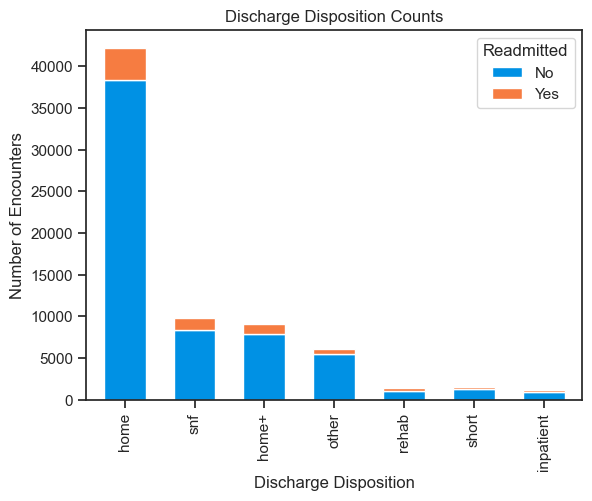

In [59]:
_=training_data.groupby("readmitted_binary")["discharge_disposition"].value_counts()\
    .unstack(level=0).sort_values(by="Yes",ascending=False).plot.bar(stacked=True,width=0.6)
plt.title('Discharge Disposition Counts')
plt.xlabel('Discharge Disposition')
plt.ylabel('Number of Encounters')
plt.legend(title ='Readmitted')
plt.show()

---

<a class="anchor" id="19">

#### 3.1.13. admission_source
    
</a>

When it comes to `admission_source`, we bundled the values into the $3$ most common categories: 
`Transfer`,`Referral, `and `Emergency`, according to their meaning.\
All other categories, together with any other unknown category that might appear in the test 
dataset will be mapped onto an `other` category, as was done with other categorical features.

In [60]:
training_data["admission_source"].value_counts()

admission_source
 Emergency Room                                               40319
 Physician Referral                                           20678
Transfer from a hospital                                       2230
 Transfer from another health care facility                    1562
Clinic Referral                                                 779
 Transfer from a Skilled Nursing Facility (SNF)                 595
HMO Referral                                                    129
 Not Mapped                                                     107
 Not Available                                                   88
 Court/Law Enforcement                                           11
 Transfer from hospital inpt/same fac reslt in a sep claim        8
 Transfer from critial access hospital                            7
 Transfer from Ambulatory Surgery Center                          2
 Extramural Birth                                                 1
Normal Delivery                

In [61]:
def admission_source_transformation(source):
    transfer={"Transfer from a hospital",
        " Transfer from another health care facility",
        " Transfer from a Skilled Nursing Facility (SNF)",
        " Transfer from hospital inpt/same fac reslt in a sep claim",
        " Transfer from critial access hospital",
        " Transfer from Ambulatory Surgery Center"}
    referral={" Physician Referral","Clinic Referral","HMO Referral"}
    # map each value to its proper new category
    if source==" Emergency Room":
        return "emerg"
    if source in transfer:
        return "transf"
    if source in referral:
        return "ref"
    return "other"

In [62]:
training_data["admission_source"]=training_data["admission_source"]\
    .map(admission_source_transformation).astype("category")

---

<a class="anchor" id="20">

#### 3.1.14. length_of_stay_in_hospital
    
</a>

`length_of_stay_in_hospital` is a positive discrete numerical variable which counts the 
number of days the patient stayed in the hospital.

In [63]:
training_data["length_of_stay_in_hospital"].value_counts().sort_index()

length_of_stay_in_hospital
1     10010
2     12119
3     12434
4      9656
5      6967
6      5237
7      4154
8      3003
9      2105
10     1637
11     1322
12     1010
13      859
14      723
Name: count, dtype: int64

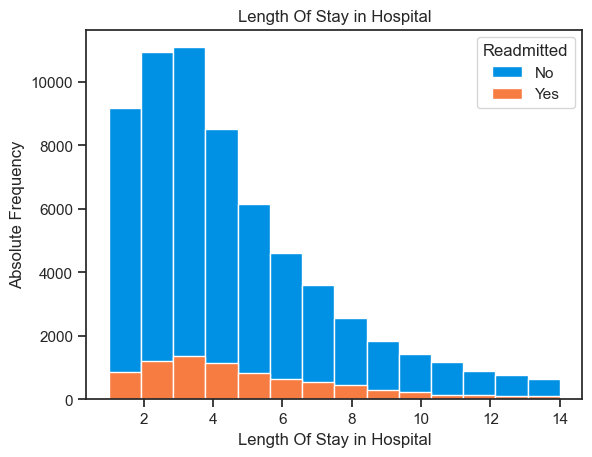

In [64]:
_=training_data.groupby("readmitted_binary")["length_of_stay_in_hospital"]\
    .plot.hist(stacked=True,bins=14)
plt.title('Length Of Stay in Hospital')
plt.xlabel('Length Of Stay in Hospital')
plt.ylabel('Absolute Frequency')
plt.legend(title ='Readmitted')
plt.show()

---

<a class="anchor" id="21">

#### 3.1.15. number_lab_tests
    
</a>

`number_lab_tests` is a discrete numerical feature and its histogram has a bell-like curve. 

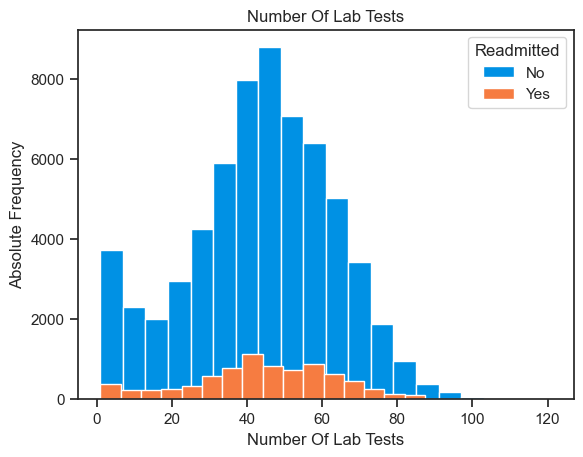

In [65]:
_=training_data.groupby("readmitted_binary")["number_lab_tests"].plot.hist(stacked=True,bins=20)
plt.xlabel("Number Of Lab Tests")
plt.ylabel("Absolute Frequency")
plt.title("Number Of Lab Tests")
plt.legend(title='Readmitted')
plt.show()

Many models perform better with features that have a Gaussian-like behaviour. \
So in order to 
increase the resemblence of the features with a Gaussian distribution, we wrote a one-way 
Gaussian transformer which converts any distribution to a Gaussian approximation. Naturally, 
depending on the feature's distribution, this transformation can output a faithful 
approximation or not. Distributions that are already bell-like tend to approximate better to a 
Gaussian under this transformation. 

The transformation goes as follows, we rank the values and normalize the ranking. The feature 
now has values between $[0,1]$, then we apply the inverse cumulative distribution of the 
Gaussian to these values, mapping them to the real line. Notice that this type of 
transformation can be done to any probability distribution.

We wrote a `Gaussianizer` transformer to apply in our pipelines.

In [66]:
class Gaussianizer():
    def __init__(self,feature_names_in=None):
        # name of the features to be gaussianized
        self.feature_names_in=feature_names_in
    def transform(self,X:pd.DataFrame):
        for feature in self.feature_names_in:
            # for each feature apply the gaussianization transformation described above
            X.loc[:,feature]=norm.ppf((rankdata(X[feature])-0.5)/len(X))
        return X

We can see the result of the transformation:

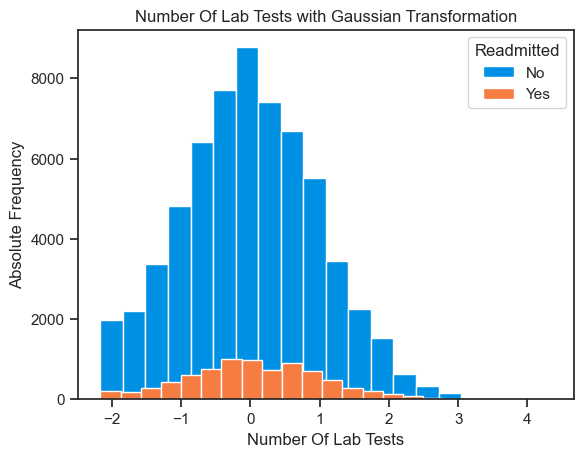

In [67]:
temporary_dataframe=training_data["readmitted_binary"].to_frame()
temporary_dataframe["number_lab_tests"]=Gaussianizer(["number_lab_tests"]).transform(\
    training_data["number_lab_tests"].to_frame())
_=temporary_dataframe.groupby("readmitted_binary")["number_lab_tests"]\
    .plot.hist(stacked=True,bins=20)
plt.xlabel("Number Of Lab Tests")
plt.ylabel("Absolute Frequency")
plt.title("Number Of Lab Tests with Gaussian Transformation")
plt.legend(title='Readmitted')
plt.show()

After the Gaussian transformation, the moments of the `number_lab_tests` distribution, tend 
towards the moments of the Gaussian distribution, that is, with unit standard deviation and 
zero in all others.

In [68]:
pd.DataFrame({
    "before":distribution_moments(training_data["number_lab_tests"]),
    "after":distribution_moments(temporary_dataframe["number_lab_tests"])},
    index=["mean","std","skewness","kurtosis"])

,before,after
mean,43.095654,0.002993
std,19.642919,0.991188
skewness,-0.236649,0.064086
kurtosis,-0.255559,-0.171111


---

<a class="anchor" id="22">

#### 3.1.16. non_lab_procedures
    
</a>

In [69]:
training_data["non_lab_procedures"].value_counts().sort_index()

non_lab_procedures
0    32632
1    14533
2     8896
3     6614
4     2928
5     2155
6     3478
Name: count, dtype: int64

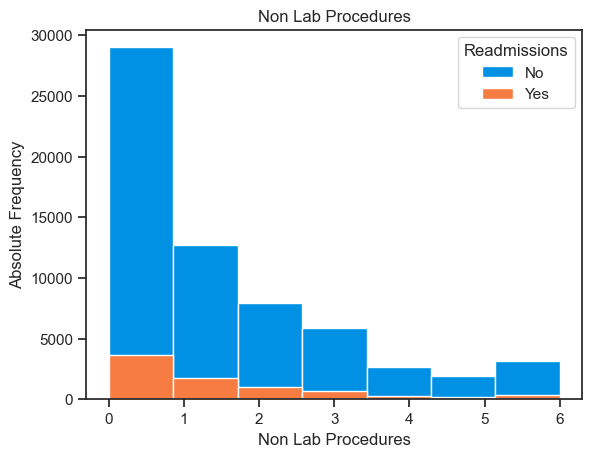

In [70]:
_=training_data.groupby("readmitted_binary")["non_lab_procedures"].plot.hist(stacked=True,bins=7)
plt.xlabel("Non Lab Procedures")
plt.ylabel("Absolute Frequency")
plt.title("Non Lab Procedures")
plt.legend(title='Readmissions')
plt.show()

---

<a class="anchor" id="23">

#### 3.1.17. number_of_medications
    
</a>

`number_of_medications` is another feature to which we can apply the `Gaussianizer` transformer.
Its histogram is has a bell-like shape.

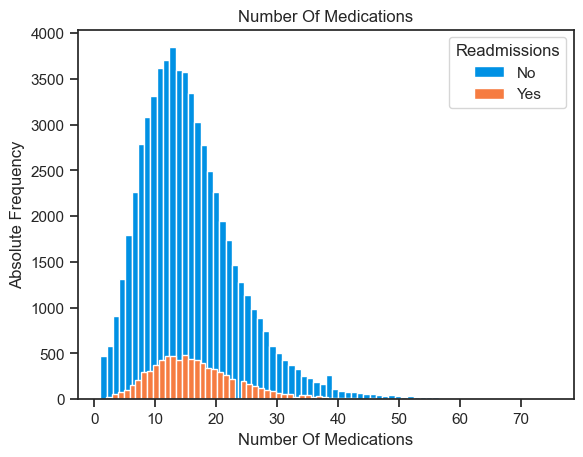

In [71]:
_=training_data.groupby("readmitted_binary")["number_of_medications"]\
    .plot.hist(stacked=True,bins=72)
plt.xlabel("Number Of Medications")
plt.ylabel("Absolute Frequency")
plt.title("Number Of Medications")
plt.legend(title='Readmissions')
plt.show()

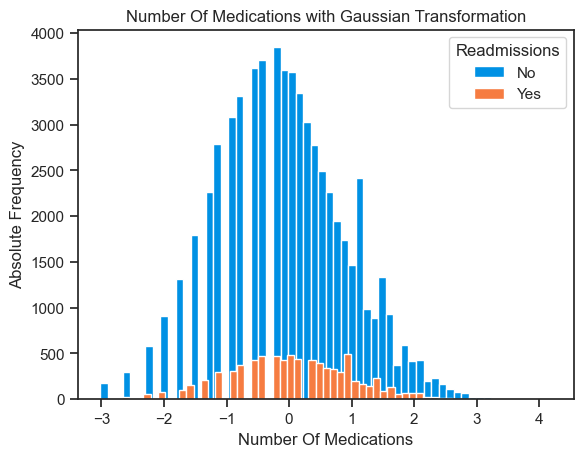

In [72]:
temporary_dataframe=training_data["readmitted_binary"].to_frame()
temporary_dataframe["number_of_medications"]=Gaussianizer(["number_of_medications"])\
    .transform(training_data["number_of_medications"].to_frame())
_=temporary_dataframe.groupby("readmitted_binary")["number_of_medications"]\
    .plot.hist(stacked=True,bins=60)
plt.xlabel("Number Of Medications")
plt.ylabel("Absolute Frequency")
plt.title("Number Of Medications with Gaussian Transformation")
plt.legend(title='Readmissions')
plt.show()

In [73]:
pd.DataFrame({
    "before":distribution_moments(training_data["number_of_medications"]),
    "after":distribution_moments(temporary_dataframe["number_of_medications"])},
    index=["mean","std","skewness","kurtosis"])

,before,after
mean,15.995452,0.000792
std,8.122347,0.997087
skewness,1.330452,0.014020
kurtosis,3.462585,-0.032637


---

<a class="anchor" id="24">

#### 3.1.18. diagnoses
    
</a>

`primary_diagnosis`, `secondary_diagnosis` and `additional_diagnosis` contain information 
regarding the diagnosis the patient recieved during hospitalization. The disease diagnosed is 
encoded acording to the ICD-9 standard, which subcategories each disease according to its type. 

In [74]:
unique_diagnosis_codes=set()
for feature in ["primary_diagnosis","secondary_diagnosis","additional_diagnosis"]:
    unique_diagnosis_codes=unique_diagnosis_codes\
        .union({elem for elem in training_data[feature].unique()})
len(unique_diagnosis_codes)

882

There are $881$ unique diagnosed diseases in our dataset.

In [75]:
unknown_diagnosis=(training_data["primary_diagnosis"]=="?")
for feature in ["secondary_diagnosis","additional_diagnosis"]:
    unknown_diagnosis|=(training_data[feature]=="?")
sum(unknown_diagnosis)

1080

And, $1080$ encounters have at least one `?` as a diagnose.

Type-$1$ diabetes' ICD-9 code is $250$. Some type-$1$ diabetes ICD-9 codes in the dataset have a 
decimal point and $2$ digits afterwards. The first digit refers to complications associated with 
diabetes, and the second digit reflects if the diabetes is or isn't stated as uncontrolled.

We create a `diabetes` binary feature, having the value of $1$ if the patient has a diabetes 
diagnose, and $0$ otherwise.

In [76]:
def diabetes(obs):
    # for each of the 3 diagnosis' variable
    for code in {obs['primary_diagnosis'],
        obs['secondary_diagnosis'],obs['additional_diagnosis']}:
        # if the patient was diagnoses with diabetes
        if code.startswith("250.") or code=="250":
            return 1
    return 0

A `diabetes_complications` categorical feature which encodes the first digit of diabetes 
diagnosis which can take the integer values between $[0,9]$. Patients that are not diagnosed 
with diabetes in the encounter take the value of $0$, patients that have a $250$ without 
decimal point are encoded as $1$, and patients with the diabetes complications digit are encoded
as $digit+2$. So we have in total $11$ categories.

In [77]:
def diabetes_complications(obs):
    # for each of the 3 diagnosis' variable
    for code in {obs['primary_diagnosis'],
        obs['secondary_diagnosis'],obs['additional_diagnosis']}:
        if code.startswith("250."):
            suffix=code.split(".")[1]
            # if there is a first digit after the decimal point
            if suffix.isalnum():
                return int(suffix[0])+2
            else:
                return 1
        if code=="250":
            return 1
    return 0

Diabetic patients that have the disease control digit, are counted towards a 
`controlled_diabetes` feature, and are given a $1$ if the disease isn't stated as uncontrolled, 
and $2$ if the disease is stated as uncontrolled, otherwise they get a $0$.

In [78]:
def controlled_diabetes(obs):
    # for each of the 3 diagnosis' variable
    for code in {obs['primary_diagnosis'],
        obs['secondary_diagnosis'],obs['additional_diagnosis']}:
        if code.startswith("250."):
            suffix=code.split(".")[1]
            # if there is a second digit
            if len(suffix)==2:
                # if the second digit is a 0 or a 1
                if suffix[1] in {"0","1"}:
                    return 1
                return 2
    return 0

Patients with a chronic diseases are more likely to be readmitted, so we create a binary 
feature, `chronic_diasease`, which shows if the patient was diagnosed with any type of cancer 
during the encounter.

In [79]:
cancer=["140","141","142","143","144","145","146","147","148","149", 
    "150","151","152","153","154","155","156","157","158","159", 
    "160","161","162","163","164","165","166","167","168","169", 
    "170","171","172","174","175","176","177","178","179","180", 
    "181","182","183","184","185","186","187","188","189","190", 
    "191","192","193","194","195","196","197","198","199","200", 
    "201","202","203","204","205","206","207","208","238.06"]

In [80]:
def chronic_disease(obs):
    # for each of the 3 diagnosis' variable
    for code in {obs['primary_diagnosis'],
        obs['secondary_diagnosis'],obs['additional_diagnosis']}:
        if code in cancer:
            return 1
    return 0

Diferent diseases impact the health of an individual differently, and the compound effect of 
various diseases affects the health of a patient by diferent degrees. This type of weighted 
effect has been studied, and is coded in the Charlson Comorbidity Index. According to the 
patient's diagnoses we can calculate the corresponding compound comorbity score.

In [81]:
comorbidity_weights = {
    '410': 1, '412': 1,  # Myocardial Infarction
    '428': 1,  # Congestive Heart Failure
    '440': 1, '441': 1,  # Peripheral Vascular Disease
    '430': 1, '431': 1, '432': 1, '433': 1, '434': 1, 
    '435': 1, '436': 1, '437': 1, '438': 1,  # Cerebrovascular Disease
    '290': 1, # Dementia
    '490': 1, '491': 1, '492': 1, '493': 1, 
    '494': 1, '495': 1, '496': 1,  # Chronic Pulmonary Disease
    '725': 1,  # Connective Tissue Disease-Rheumatic Disease
    '531': 1, '532': 1, '533': 1, '534': 1,  # Peptic Ulcer Disease
    '570': 1, '571': 1,  # Mild Liver Disease 
    '342': 2, '343': 2, # Paraplegia and Hemiplegia
    '582': 2, '585': 2, '586': 2, '588.0': 2,'V56': 2,  # Renal Disease
    '140': 2, '141': 2, '142': 2, '143': 2, '144': 2, '145': 2, '146': 2, 
    '147': 2, '148': 2, '149': 2, '150': 2, '151': 2, '152': 2, '153': 2, 
    '154': 2, '155': 2, '156': 2, '157': 2, '158': 2, '159': 2, '160': 2, 
    '161': 2, '162': 2, '163': 2, '164': 2, '165': 2, '166': 2, '167': 2, 
    '168': 2, '169': 2, '170': 2, '171': 2, '172': 2, '174': 2, '175': 2, 
    '176': 2, '177': 2, '178': 2, '179': 2, '180': 2, '181': 2, '182': 2, 
    '183': 2, '184': 2, '185': 2, '186': 2, '187': 2, '188': 2, '189': 2, 
    '190': 2, '191': 2, '192': 2, '193': 2, '194': 2, '195': 2, '196': 2, 
    '197': 2, '198': 2, '199': 2, '200': 2, '201': 2, '202': 2, '203': 2, 
    '204': 2, '205': 2, '206': 2, '207': 2, '208': 2,  # Cancer
    '196': 6, '197': 6, '198': 6, '199': 6,  # Metastatic Carcinoma
    '042': 6, '043': 6, '044': 6} # HIV/AIDS

In [82]:
def comorbidity_score(obs):
    comorbidity_score=0
    # for each of the 3 diagnosis' variable
    for code in {obs['primary_diagnosis'],
        obs['secondary_diagnosis'],obs['additional_diagnosis']}:
        code=code.strip()
        # sum cumulatively the comorbiditiy weights of each diagnose 
        if code in comorbidity_weights:
            comorbidity_score+=comorbidity_weights[code]
    return comorbidity_score

Ranges of the ICD-9 score reflect the type of disease the patient has diagnosed with. 
For example, codes that are between $[390,460[$ reflect health complications in the patient's 
circulatory system. After creating the new features which are related to diabetes, 
chronic diseases, and comorbidity score. We can bundle each diagnosis feature's value into the 
ICD-9 range it belongs to. 

In [83]:
def icd9_transformation(code):
    # if the code starts with an "V" or an "E", return that letter
    if code[0].isalpha():
        return code[0].lower()
    # if it is diabetes, it belong to the "enmi" category
    if code.startswith("250."):
        return "enmi"
    try:
        code=int(code)
    # if the reamining code cannot be converted to integer integer, then it is "unknown"
    except ValueError:
        return "unknown"
    code_ranges=[
            (1,140,"ipd"), 
            (140,240,"neo"),
            (240,280,"enmi"),
            (280,290,"b"),
            (290,320,"men"),
            (320,390,"n"),
            (390,460,"c"),
            (460,520,"r"),
            (520,580,"d"),
            (580,630,"g"),
            (630,680,"pcp"),
            (680,710,"s"),
            (710,740,"mc"),
            (740,760,"cong"),
            (760,780,"pp"),
            (780,800,"ssi"),
            (800,1000,"ip")]
    for start,end,encoding in code_ranges:
        # return the category depending where the code is in the brackets
        if start<=code<end:
            return encoding
    return "unknown"

In [84]:
training_data["diabetes"]=training_data.apply(diabetes,axis=1).astype("int64")

In [85]:
training_data["diabetes_complications"]=training_data.apply(diabetes_complications,
    axis=1).astype("int64")

In [86]:
training_data["controlled_diabetes"]=training_data.apply(controlled_diabetes,
    axis=1).astype("int64")

In [87]:
training_data["chronic_disease"]=training_data.apply(chronic_disease,axis=1).astype("int64")

In [88]:
training_data["comorbidity_score"]=training_data.apply(comorbidity_score,axis=1).astype("int64")

In [89]:
for feature in ["primary_diagnosis","secondary_diagnosis","additional_diagnosis"]:
    training_data[feature]=training_data[feature].map(icd9_transformation).astype("category")

After ploting a bar chart of each diagnosis feature, it was decided that the $3$ less frequent 
values of both `primary_diagnosis` and `secondary` would be encoded into a simple category 
`other`, in order to reduce the number of possible categories, and the dimensionallity of 
the feature space in case we do one hot encoding on categorical features.

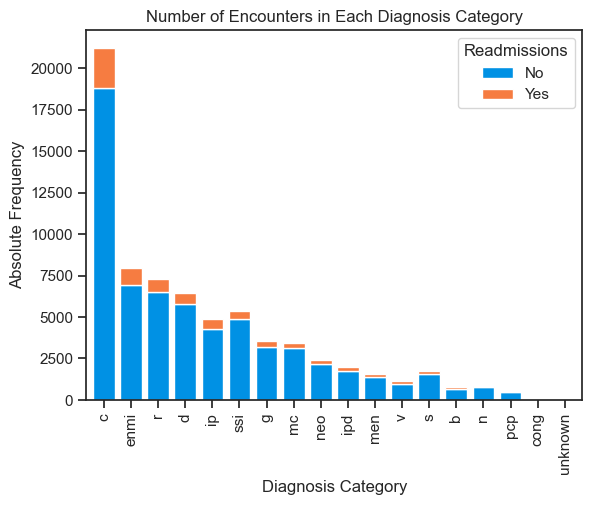

In [90]:
_=training_data.groupby("readmitted_binary")["primary_diagnosis"].value_counts()\
    .unstack(level=0).sort_values(by="Yes",ascending=False).plot.bar(stacked=True,width=0.8)
plt.xlabel("Diagnosis Category")
plt.ylabel("Absolute Frequency")
plt.title("Number of Encounters in Each Diagnosis Category")
plt.legend(title='Readmissions')
plt.show()

In [91]:
diagnosis_map={
    "pcp":"other",
    "cong":"other",
    "unknown":"other"}

In [92]:
for feature in ["primary_diagnosis","secondary_diagnosis","additional_diagnosis"]:
    training_data[feature]=training_data[feature].map(\
        lambda code: diagnosis_map[code] if code in diagnosis_map else code).astype("category")

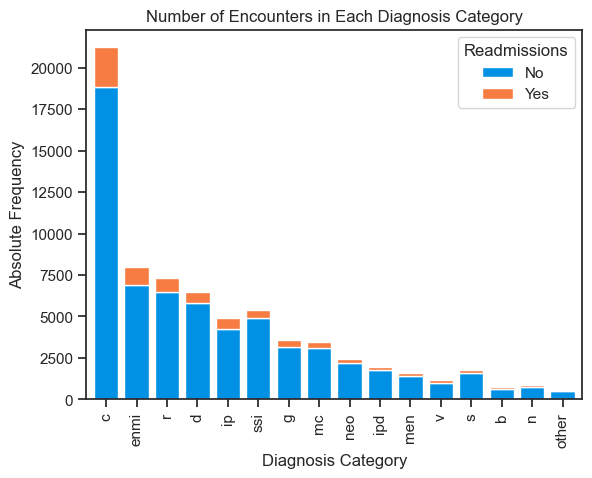

In [93]:
_=training_data.groupby("readmitted_binary")["primary_diagnosis"].value_counts()\
    .unstack(level=0).sort_values(by="Yes",ascending=False).plot.bar(stacked=True,width=0.8)
plt.xlabel("Diagnosis Category")
plt.ylabel("Absolute Frequency")
plt.title("Number of Encounters in Each Diagnosis Category")
plt.legend(title='Readmissions')
plt.show()

---

<a class="anchor" id="25">

#### 3.1.19. number_diagnoses
    
</a>

It can be seen that $10$ is a natural cut-off value in the `number_diagnoses` feature, which 
counts the number of diagnoses that where attributed to the patient during its stay in the 
hospital.

In [94]:
training_data["number_diagnoses"].value_counts().sort_index()

number_diagnoses
1       164
2       727
3      1994
4      3903
5      7921
6      7134
7      7264
8      7375
9     34669
10       15
11        7
12        7
13       13
14        4
15        6
16       33
Name: count, dtype: int64

So, in order to deal with these outliers, we wrote a simple `Filter` transformer which substitutes 
all the values of the feature which are above a specific limit by the limit.

In [95]:
class Filter():
    def __init__(self,limit,feature_names_in):
        # take as argument a hard coded limit
        self.limit=limit
        # names of the feature to which we want to apply the transformation
        self.feature_names_in=feature_names_in
    def transform(self,X:pd.DataFrame):
        for feature in self.feature_names_in:
            # for each feature, squach the outliers onto the defined limit
            X.loc[:,feature]=X[feature].map(\
                lambda value: self.limit if value>self.limit else value)
        return X

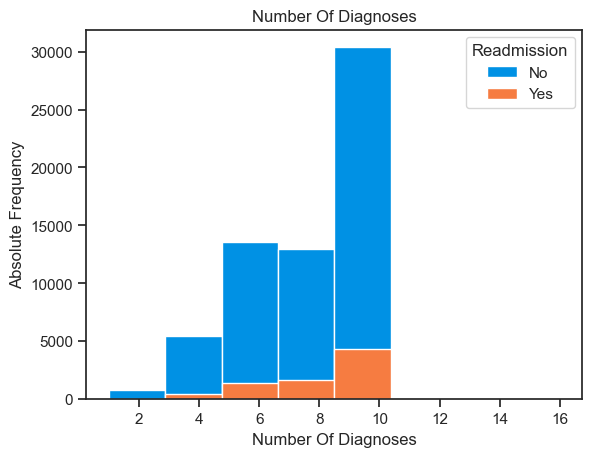

In [96]:
_=training_data.groupby("readmitted_binary")["number_diagnoses"].plot.hist(stacked=True,bins=8)
plt.xlabel("Number Of Diagnoses")
plt.ylabel("Absolute Frequency")
plt.title("Number Of Diagnoses")
plt.legend(title='Readmission')
plt.show()

After filtering the outliers:

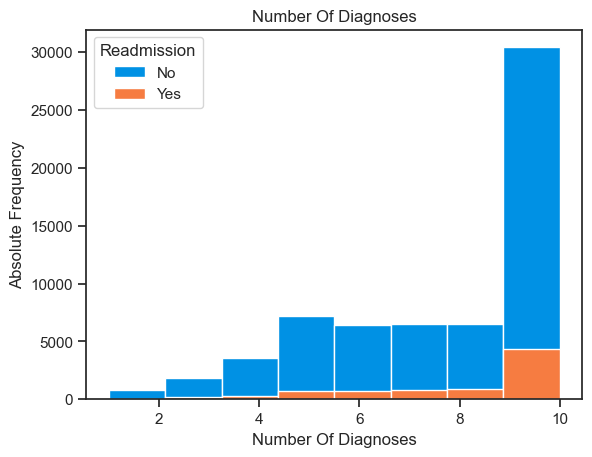

In [97]:
temporary_dataframe=training_data["readmitted_binary"].to_frame()
temporary_dataframe["number_diagnoses"]=Filter(10,["number_diagnoses"])\
    .transform(training_data["number_diagnoses"].to_frame())
_=temporary_dataframe.groupby("readmitted_binary")["number_diagnoses"]\
    .plot.hist(stacked=True,bins=8)
plt.xlabel("Number Of Diagnoses")
plt.ylabel("Absolute Frequency")
plt.title("Number Of Diagnoses")
plt.legend(title='Readmission')
plt.show()

---

<a class="anchor" id="26">

#### 3.1.20. test_results
    
</a>

For each encounter, `glucose_test_result` and `a1c_test_result` contain the outcome of the test 
if it was made.

In [98]:
training_data["glucose_test_result"].value_counts().sort_index()

glucose_test_result
>200    1055
>300     827
Norm    1806
Name: count, dtype: int64

In [99]:
training_data["a1c_test_result"].value_counts().sort_index()

a1c_test_result
>7      2708
>8      5705
Norm    3503
Name: count, dtype: int64

We will encode the test's normal levels as $1$, high levels as $2$, and extreme levels as $3$. 
For patient who have not performed the test will get $0$.

Normal glucose levels are around $100mmol/L$ and normal a1c test levels are below $6\%$, so the 
ratio of the diferences between levels is maintained with this encoding.

In [100]:
glucose_test_result_map={"Norm":1,">200":2,">300":3}

In [101]:
a1c_test_result_map={"Norm":1,">7":2,">8":3}

In [102]:
training_data["glucose_test_result"]=training_data["glucose_test_result"].map(lambda value: \
    safe_mapping(value,glucose_test_result_map,0)).astype("int64")

In [103]:
training_data["a1c_test_result"]=training_data["a1c_test_result"].map(lambda value: \
    safe_mapping(value,a1c_test_result_map,0)).astype("int64")

---

<a class="anchor" id="27">

#### 3.1.21. change_in_meds_during_hospitalization and prescribed_diabetes_meds
    
</a>

`change_in_meds_during_hospitalization` and `prescribed_diabetes_meds` are already binary features, we only convert them to an integer representation.

In [104]:
training_data["change_in_meds_during_hospitalization"].value_counts(normalize=True).round(3)

change_in_meds_during_hospitalization
No    0.538
Ch    0.462
Name: proportion, dtype: float64

In [105]:
training_data["prescribed_diabetes_meds"].value_counts(normalize=True).round(3)

prescribed_diabetes_meds
Yes    0.771
No     0.229
Name: proportion, dtype: float64

In [106]:
change_in_meds_during_hospitalization_map={"Ch":1,"No":0}

In [107]:
prescribed_diabetes_meds_map={"Yes":1,"No":0}

In [108]:
training_data["change_in_meds_during_hospitalization"]=\
    training_data["change_in_meds_during_hospitalization"].map(lambda value: \
    safe_mapping(value,change_in_meds_during_hospitalization_map,0)).astype("int64")

In [109]:
training_data["prescribed_diabetes_meds"]=training_data["prescribed_diabetes_meds"].map(lambda value: \
    safe_mapping(value,prescribed_diabetes_meds_map,0)).astype("int64")

---

<a class="anchor" id="28">

#### 3.1.22. medication
    
</a>

The feature `medication` contains square brackets with a list of the diabetes medications 
prescribed to the patient. Many of these medications are a combination of two active compounds.
In these cases, the medication has a `-` separating the name of the two active compounds.

`count_medication` counts the number of medications prescribed and is used to create a new 
feature.

In [110]:
def count_medication(med):
    count=0
    for char in med:
        # the list contains single-quoted medications
        # so for every pair of single-quotes, there is one medication
        if char=="'":
            count+=1
    return count//2

In [111]:
training_data["number_of_diabetes_meds"]=training_data["medication"].map(count_medication).astype("int64")

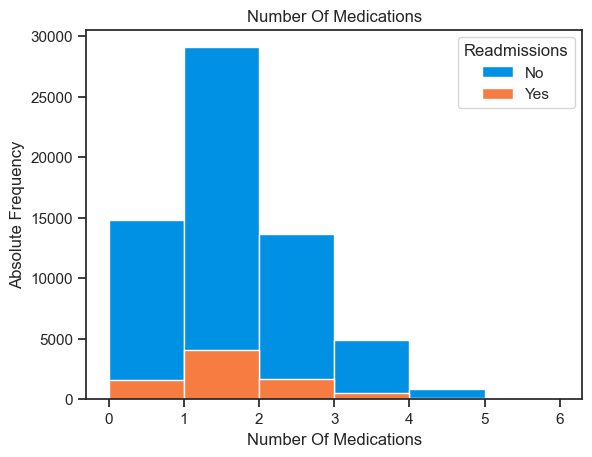

In [112]:
_=training_data.groupby("readmitted_binary")["number_of_diabetes_meds"].plot.hist(stacked=True,bins=6)
plt.xlabel("Number Of Medications")
plt.ylabel("Absolute Frequency")
plt.title("Number Of Medications")
plt.legend(title='Readmissions')
plt.show()

`get_unique_medications` returns a set with all the unique medications prescribed in the whole 
dataset.

In [113]:
def get_unique_medications(data:pd.DataFrame):
    unique_medications=set()
    for meds in data["medication"]:
        # return the sring within "[]", and separate it by ","
        for compound_med in (re.search(r'(?<=\[)(.*?)(?=\])',meds)[0]).split(sep=','):
            # if its not empty, there where prescribed medications
            if compound_med!="":
                compound_med=compound_med.strip()
                # if the medication has more than one active coumpound
                for med in compound_med.split(sep='-'):
                    # separate them and add to the dictionary if it is not there already
                    unique_medications.add(med.strip("'"))
    return unique_medications

In [114]:
unique_medications=get_unique_medications(training_data)

Binary features are created for each unique compound.

In [115]:
for med in unique_medications:
    training_data[med]=training_data["medication"].map(lambda meds: med in meds).astype("int64")

In [116]:
del training_data["medication"]

Active compounds with an absolute frequency of less than $1000$ were considered to be 
negligible when compared to the frequency of other active substances. So we agregate them in a 
single bianry feature `other_diabetes_medication` which takes the value of $1$ if the patient 
was prescribed any of these active compounds.

In [117]:
medication_counter=[]
for med in unique_medications:
    medication_counter.append(sum(training_data[med]))
pd.Series(medication_counter,index=list(unique_medications)).sort_values(ascending=False)

insulin           38105
metformin         14431
glipizide          8915
glyburide          7985
pioglitazone       5093
rosiglitazone      4474
glimepiride        3575
repaglinide        1078
nateglinide         478
acarbose            206
chlorpropamide       54
tolazamide           28
miglitol             27
tolbutamide          17
troglitazone          2
acetohexamide         1
dtype: int64

In [118]:
infrequent_medications={"tolazamide","troglitazone","chlorpropamide","acetohexamide",
    "acarbose","miglitol","nateglinide","tolbutamide"}

In [119]:
unique_medications-=infrequent_medications

In [120]:
training_data["other_diabetes_medication"]=0
for med in infrequent_medications:
    # incrementaly apply the or operator for every infrequent medication 
    training_data["other_diabetes_medication"]|=training_data[med]
    del training_data[med]

---

<a class="anchor" id="29">

#### 3.1.23. readmitted_binary
    
</a>

We convert the `readmitted_binary` values into an integer representation and separate the 
feature out of the training dataset, into a `pd.Series` called `binary_target`.

In [121]:
training_data["readmitted_binary"]=(training_data["readmitted_binary"]=="Yes").astype("int64")

In [122]:
binary_target=training_data.pop("readmitted_binary")

The dataset is highly imbalanced, that is, only roughly $11\%$ of the instances observed are 
readmitted within one month. We will deal with this issue with various techniques, including 
optimal thresholds, balanced class weights and oversampling strategies, and see which work best.

In [123]:
round(binary_target.mean(),3)

0.112

---

<a class="anchor" id="30">

#### 3.1.24. readmitted_multiclass
    
</a>

Similarly we convert the `No`, `<30 days` and `>30 days` categories into $0$, $1$, and $2$ 
respectively; and remove the column from the original dataset.

In [124]:
readmitted_multiclass_map={"<30 days":1,">30 days":2}

In [125]:
training_data["readmitted_multiclass"]=training_data["readmitted_multiclass"]\
    .map(lambda cat: safe_mapping(cat,readmitted_multiclass_map,0)).astype("int64")

In [126]:
multiclass_target=training_data.pop("readmitted_multiclass")

The multiclass target is also imbalanced.

In [127]:
multiclass_target.value_counts(normalize=True).round(3).sort_index()

readmitted_multiclass
0    0.539
1    0.112
2    0.349
Name: proportion, dtype: float64

---

<a class="anchor" id="31">

#### 3.1.25. patient_id
    
</a>

In [128]:
len(training_data["patient_id"].unique())

53985

The same patient can visit the hospital multiple times. This means that there are observations 
in the dataset that are not independent and are causally related. We can take advantage of this 
situation to enhance our model's performances. 

Nevertheless he have to be careful, hospital visits of the same patient are temporally related,
and we are not sure if the training data comes before the test data. All we can do is verify 
if we can prove the contrary.

In [129]:
dead_patient_ids=training_data["patient_id"][training_data.index.isin(dead_index)]
test_data["patient_id"].isin(dead_patient_ids).any()

True

In fact there are patient which are dead in the training dataset, but visit the hospital in the 
test set. This means that the datasets are not time ordered, and if we used `patient_id` 
as a source of information for some predicative modeling, we would possibly use future 
information to predict the past. A crude mistake!

In [130]:
del training_data["patient_id"]

---

<a class="anchor" id="32">

### 3.2. Preprocessing
    
</a>

In [131]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   race                                   71236 non-null  category
 1   gender                                 71236 non-null  int64   
 2   age                                    67679 non-null  Int64   
 3   payer_code                             71236 non-null  category
 4   outpatient_visits_in_previous_year     71236 non-null  int64   
 5   emergency_visits_in_previous_year      71236 non-null  int64   
 6   inpatient_visits_in_previous_year      71236 non-null  int64   
 7   admission_type                         71236 non-null  category
 8   medical_specialty                      71236 non-null  category
 9   average_pulse_bpm                      71236 non-null  int64   
 10  discharge_disposition                  71236 non-null  ca

In [132]:
mapped_categorical={
    "race":race_map,
    "payer_code":payer_code_map,
    "admission_type":admission_type_map,
    "medical_specialty":medical_specialty_map}

In [133]:
mapped_ordinal={
    "glucose_test_result":glucose_test_result_map,
    "a1c_test_result":a1c_test_result_map,
    "change_in_meds_during_hospitalization":change_in_meds_during_hospitalization_map,
    "prescribed_diabetes_meds":prescribed_diabetes_meds_map}

In [134]:
transformed_categorical={
    "discharge_disposition":discharge_disposition_transformation,
    "admission_source":admission_source_transformation}

In [135]:
long_tail=[
    "emergency_visits_in_previous_year",
    "outpatient_visits_in_previous_year",
    "inpatient_visits_in_previous_year"]

In [136]:
discrete_numerical=[
    "length_of_stay_in_hospital",
    "number_lab_tests",
    "non_lab_procedures",
    "number_of_medications",
    "number_diagnoses",
    "average_pulse_bpm"]

In [137]:
engineered_numerical={
    "diabetes":diabetes,
    "diabetes_complications":diabetes_complications,
    "controlled_diabetes":controlled_diabetes,
    "chronic_disease":chronic_disease,
    "comorbidity_score":comorbidity_score}

Throughout our data exploration and cleaning effort we have been preprocessing our training 
dataset feature-by-feature. We will have to apply all of the above transformations in the test 
dataset in a similar manner. So we created a preprocessing function, `preprocess`, which 
replicates all of the steps performed on the training dataset, on the argument dataframe. 

In [138]:
def preprocess(dataframe:pd.DataFrame):
    dataframe=dataframe.copy()
    # set index
    dataframe.set_index("encounter_id",inplace=True)
    # finds the index of dead patients
    dead_index=dataframe.index[dataframe["discharge_disposition"].isin(dead)]
    # applies the corresponding map to the categorical features
    for feature,map in mapped_categorical.items():
        dataframe[feature]=dataframe[feature].map(lambda value: safe_mapping(value,
            map,"other")).astype("category")
    # applies the corresponding map to the ordinal features
    for column,map in mapped_ordinal.items():
        dataframe[column]=dataframe[column].map(lambda value: safe_mapping(value,
            map,0)).astype("int64")
    # applies the corresponding transformation to the categorical features
    for feature,transformation in transformed_categorical.items():\
        dataframe[feature]=dataframe[feature].map(transformation).astype("category")
    # applies the gender transformation to the gender feature
    dataframe["gender"]=dataframe["gender"].map(gender_transformation).astype("int64")
    # applies the age transformation to the age feature, ignoring nans
    dataframe["age"]=dataframe["age"].map(age_transformation,
        na_action="ignore").astype("Int64")
    # creates and computes the total_visists_in_previosu_year feature
    dataframe["total_visits_in_previous_year"]=0
    for feature in long_tail:
        dataframe["total_visits_in_previous_year"]+=dataframe[feature]
    # applies the count_medication transform to create the number_of_diabetes_meds feature
    dataframe["number_of_diabetes_meds"]=dataframe["medication"]\
        .map(count_medication).astype("int64")
    # converts all numerical features to the correct representation
    for feature in discrete_numerical:
        dataframe[feature]=dataframe[feature].astype("int64")
    # creates and fills the  other_diabetes_medication feature
    dataframe["other_diabetes_medication"]=0
    for med in infrequent_medications:
        dataframe["other_diabetes_medication"]|=dataframe["medication"]\
            .map(lambda meds: med in meds).astype("int64")
    # transforms the remaining medications as one-hot encoded features 
    for feature in unique_medications:
        dataframe[feature]=dataframe["medication"].map(\
            lambda meds: feature in meds).astype("int64")
    # creates all the engineered features from the diagnoses columns
    for feature,function in engineered_numerical.items():
        dataframe[feature]=dataframe.apply(function,axis=1).astype("int64")
    # transforms each of the diagnosis features into its proper encoding
    for feature in ["primary_diagnosis","secondary_diagnosis","additional_diagnosis"]:
        dataframe[feature]=dataframe[feature]\
            .map(icd9_transformation).astype("category")
        dataframe[feature]=dataframe[feature].map(lambda code: \
            diagnosis_map[code] if code in diagnosis_map else code).astype("category")
    # removes unnecessary columns from the dataset
    dataframe.drop(["country","weight","medication","patient_id"],axis=1,inplace=True)
    # returns the preprocessed dataframe and the collection of indexes of deceased patients
    return dataframe.copy(),dead_index

<div class="alert alert-block alert-success">

## 4. Transformations and Nan Imputing <a class="anchor" id="33"></a>
    

    
</div>

Features of categorical type have to be either ordinal encoded or one-hot encoded.

In [139]:
categorical_type_features=[
    "race",
    "payer_code",
    "admission_type",
    "medical_specialty",
    "discharge_disposition",
    "admission_source",
    "primary_diagnosis",
    "secondary_diagnosis",
    "additional_diagnosis"]

If in either `sklearn's` `OrdinalEncoder` or `OneHotEncoder` the `categories` argument 
is set to `auto`, it can happen that a category not found in the training dataset unables the 
posterior encoding in the test set. To avoid this situation, we define `ordinal_categories` 
and `onehot_categories` lists which exausts all the possible categories for each 
appropriate feature, and pass them as arguemnt to the respective encoders.

In [140]:
ordinal_categories=[
    np.array(["cauc","afam","hisp","asian","other"]),
    np.array(["none","mc","hm","sp","bc","md","cp","un","cm","other"]),
    np.array(["emerg","elec","other"]),
    np.array(["unknown","other","int","gen","card","surg","ortho","neph","radio","pulm"]),
    np.array(["home","snf","home+","other","rehab","short","inpatient"]),
    np.array(["emerg","ref","other","transf"]),
    np.array(["v","e","ipd","neo","enmi","b","men","n","c","r","d","g","s","mc","pp","ssi","ip","other"]),
    np.array(["v","e","ipd","neo","enmi","b","men","n","c","r","d","g","s","mc","pp","ssi","ip","other"]),
    np.array(["v","e","ipd","neo","enmi","b","men","n","c","r","d","g","s","mc","pp","ssi","ip","other"])]

Even after having our previously defined transformers inheriting base classes from `sklearn` we 
couldn't make them work as pure `sklearn` objects. And so, as we will see we had to create our 
own pipeline to apply all of these transformations. Using a `ColumnTransformer` would 
overcomplicate the instantiation of the pipeline object. So we decided to create our own 
`SpecializedOrdinalEncoder` and `SpecializedOneHotEncoder`.

In [141]:
class SpecializedOrdinalEncoder():
    def __init__(self,feature_names_in):
        # which features to applicate the encoding
        self.feature_names_in=feature_names_in
        # defining the encoder
        self.encoder=OrdinalEncoder(categories=ordinal_categories,dtype=np.int64)
    def fit(self,X:pd.DataFrame):
        self.encoder.fit(X[self.feature_names_in])
    def transform(self,X:pd.DataFrame):
        # transforms columns
        X.loc[:,self.feature_names_in]=self.encoder\
            .transform(X[self.feature_names_in])
        return X

In [142]:
gaussianized_features=["number_lab_tests","number_of_medications"]

In [143]:
log_transformed_features=["total_visits_in_previous_year"]+long_tail

We want to apply all of the transformations, feature selection methods and encodings at the 
validation level. In order to do so our models' pipelines must contain all of the 
transformations, filterings and encodings. As mentioned before, we were unable to create pure 
`sklearn` objects that meshed perfectly with `sklearn`'s `Pipeline`. So, we were left with the 
option of creating our own `Pipeline`. 

The `Pipeline` we wrote leverages only the method names of each class, for example, if some 
object in the pipelin's chain is a model it must have a `predict` method, if it is a 
transformer it must have a `transformer` method. This way of designing the pipeline ensures 
that we can chain `sklearn` objects, `imblearn` objects, and the objects we defined throughout 
the notebook seamlessly.

We also incorporated `sample_weights` as a method to deal with class imbalance, feature 
importances extraction for models that support them.

In [144]:
class Pipeline():
    def __init__(self,*instances,**kwargs):
        self.proba_support=False
        self.importances_support=False
        self.sample_weights=False
        instances=list(instances)
        # setup sample_weights if it is defined
        if "class_weight" in kwargs and \
            kwargs["class_weight"]=="sample_weights":
            del kwargs["class_weight"]
            self.sample_weights=True
        # instantiate predicative model, if needed
        if isinstance(instances[-1],type):
            instances[-1]=instances[-1](**kwargs)
        # verify if the model has probability output support
        if hasattr(instances[-1],"predict_proba"):
            self.proba_support=True
        self.instances=instances
    def _transform(self,X:pd.DataFrame):
        # private method for applying transformations if they were fitted
        X=X.copy()
        for instance in self.instances:
            if hasattr(instance,"transform"):
                X=instance.transform(X)
        return X
    def fit_transform(self,X:pd.DataFrame,y:pd.Series):
        # y is passed to the fit_trasnform method in case the is an 
        # "imblearn" oversampler present in the chain
        X=X.copy()
        for instance in self.instances:
            if hasattr(instance,"fit_resample"):
                # oversampling if instance is present
                X,y=instance.fit_resample(X,y)
            if hasattr(instance,"transform"):
                if hasattr(instance,"fit"):
                    # fit first
                    instance.fit(X)
                # transform afterwards
                X=instance.transform(X)
        return X,y
    def fit(self,X:pd.DataFrame,y:pd.Series,**kwargs):
        # this fit methods, fits the predicative model
        X,y=self.fit_transform(X,y)
        self.instances[-1].fit(X,y,**kwargs)
        # after fitting we verify if the feature_importances or 
        # coef attributes were computed
        if hasattr(self.instances[-1],"feature_importances_") or \
            isinstance(self.instances[-1],Lasso):
            self.importances_support=True
    def predict(self,X:pd.DataFrame):
        X=self._transform(X)
        return self.instances[-1].predict(X)
    def fit_predict(self,X:pd.DataFrame,y:pd.Series):
        self.fit(X,y)
        return self.predict(X)
    def predict_proba(self,X:pd.DataFrame):
        # if the model support outcome probabilities, it returns them
        if self.proba_support:
            X=self._transform(X)
            return self.instances[-1].predict_proba(X)
    def fit_predict_proba(self,X:pd.DataFrame,y:pd.Series):
        self.fit(X)
        return self.predict_proba(X,y)
    def feature_importances(self):
        # return feature importances
        if self.importances_support:
            if hasattr(self.instances[-1],"feature_importances_"):
                return self.instances[-1].feature_importances_
            if hasattr(self.instances[-1],"coef_"):
                return self.instances[-1].coef_

We can now chain the transformers we have constructed thus far and apply them to the 
training dataset:

In [145]:
transformation_pipeline=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]))

In [146]:
transformation_pipeline.fit_transform(training_data,_)[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   race                                   71236 non-null  int64  
 1   gender                                 71236 non-null  int64  
 2   age                                    67679 non-null  Int64  
 3   payer_code                             71236 non-null  int64  
 4   outpatient_visits_in_previous_year     71236 non-null  float64
 5   emergency_visits_in_previous_year      71236 non-null  float64
 6   inpatient_visits_in_previous_year      71236 non-null  float64
 7   admission_type                         71236 non-null  int64  
 8   medical_specialty                      71236 non-null  int64  
 9   average_pulse_bpm                      71236 non-null  int64  
 10  discharge_disposition                  71236 non-null  int64  
 11  a

In [147]:
onehot_features=categorical_type_features+["diabetes_complications"]

In [148]:
onehot_categories=ordinal_categories+[np.arange(12)]

The only preprocessed feature which has `Nan`s is the `age`. We will fill these missing values 
using KNN imputer which determines the missing age of a patient according to its nearest 
neighbors, and their corresponding age. Unfortunately, `sklearn` does not provide a KNN 
categorical imputer, but this problem is a classification one with instances which have an age 
as the training set and encounters with a missing age as a predict set.

KNN is an algorithm which works well in these cases, because is unparameterized and we do not 
have to deal with over or under fitting issues. We want to select features that are correlated 
to the age in order to predict the missing age with some degree of accuracy. So we calculate 
the spearman correlation between the age and the remaining ordinal features, and sort them in 
descending order.

In [149]:
ordinal_features=list(set(training_data.columns)-set(onehot_features))

In [150]:
age_correlation=transformation_pipeline.fit_transform(training_data,_)[0]\
    .loc[~training_data["age"].isna(),ordinal_features].corr("spearman")["age"]\
    .abs().sort_values(ascending=False)
age_correlation.drop("age",inplace=True)
age_correlation

diabetes                                 0.235424
controlled_diabetes                      0.219156
number_diagnoses                         0.196853
comorbidity_score                        0.186552
length_of_stay_in_hospital               0.123473
a1c_test_result                          0.110831
metformin                                0.078444
insulin                                  0.071814
glyburide                                0.068604
gender                                   0.066934
non_lab_procedures                       0.061351
emergency_visits_in_previous_year        0.055228
repaglinide                              0.051210
glipizide                                0.048702
chronic_disease                          0.047225
glucose_test_result                      0.041325
change_in_meds_during_hospitalization    0.040506
glimepiride                              0.032301
number_lab_tests                         0.029870
number_of_medications                    0.029096


We decided to training our KNN imputer with ordinal features which have a spearman correlation 
with `age` above $0.05$.

In [151]:
imputer_features=list(age_correlation.index[age_correlation>0.05])

Nan imputing is a transformation done to dataset, we should fit and transform the training set, 
and simply transform the test dataset. So the `KNNCategoricalImputer` plays the role of a 
transformer within our pipelines.

In [152]:
class KNNCategoricalImputer():
    def __init__(self,nanned_feature,feature_names_in,n_neighbors=5):
        self.n_neighbors=n_neighbors
        # feature with the nan entries
        self.nanned_feature=nanned_feature
        # features correlated with the target to serve as training set columns
        self.feature_names_in=feature_names_in
    def fit(self,X:pd.DataFrame):
        # boolean mask which references entries which are nan
        mask=X[self.nanned_feature].isna()
        self.estimator=Pipeline(
            # all features must be in the same scale
            MinMaxScaler(),
            # KNN Classifier voting is weighted according to distance
            KNeighborsClassifier(n_neighbors=self.n_neighbors,weights="distance"))
        # fit the pipeline with valid entries
        self.estimator.fit(X.loc[~mask,self.feature_names_in],
            X.loc[~mask,self.nanned_feature])
    def transform(self,X:pd.DataFrame):
        mask=X[self.nanned_feature].isna()
        # after fitting predict the new values of nan entries
        X.loc[mask,self.nanned_feature]=self.estimator\
            .predict(X.loc[mask,self.feature_names_in])
        # convert nanned_feature type to an integer representation
        X[self.nanned_feature]=X[self.nanned_feature].astype("int64")
        return X

We can now see this transformer in action by `fit_transform` the training dataset:

In [153]:
transformation_pipeline=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features))

In [154]:
transformation_pipeline.fit_transform(training_data,_)[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   race                                   71236 non-null  int64  
 1   gender                                 71236 non-null  int64  
 2   age                                    71236 non-null  int64  
 3   payer_code                             71236 non-null  int64  
 4   outpatient_visits_in_previous_year     71236 non-null  float64
 5   emergency_visits_in_previous_year      71236 non-null  float64
 6   inpatient_visits_in_previous_year      71236 non-null  float64
 7   admission_type                         71236 non-null  int64  
 8   medical_specialty                      71236 non-null  int64  
 9   average_pulse_bpm                      71236 non-null  int64  
 10  discharge_disposition                  71236 non-null  int64  
 11  a

The `age` feature no longer contains missing values!

<div class="alert alert-block alert-success">

## 5. Feature Selection <a class="anchor" id="34"></a>
    

    
</div>

In order to select the relevant features to our classification problem, we employ 4 methods of 
feature selection. 

Two of them are statistical and, since they work under the assumption that 
each entry is extracted from independently from identitcal distribution, there is no need to 
perform the computation inside the validation loop.

The remaining two, on the other hand, estimate feature's importance to the classification 
problem at hand by fitting a classifier to the training data and obtain the feature's 
importance according to model's estimate.

We chose two models with very distinct arquitectures, a Decision Tree and their inherent 
feature importance estimate, and a Lasso Regression in which the coeficients of unimportant 
features are $0.0$.

---

<a class="anchor" id="35">

### 5.1 Statistical Methods
    
</a>

In [155]:
transformed_data,_=transformation_pipeline.fit_transform(filter(training_data),_)

We apply the `chi2` and `anova` statistical tests. The `chi2` test provides a way of 
determining if there exists statistical dependency between the feature and the target, and the 
`anova` test provides a way of testing if there is linearity between the feature variable and 
the target variable. 

Out of the resulting p-values, we select the $13$ worst features. This 
might be unorthodox, but it is equivalant to saying that we select the confidence level to be 
the one corresponding the p-value of the $13th$ worst feature.

In [156]:
def mask_for_13_worst(array):
    worst=np.argpartition(array,13)[:13][-1]
    return (array<=array[worst])

In [157]:
chi2_results=mask_for_13_worst(chi2(transformed_data,filter(binary_target))[1])

In [158]:
anova_results=mask_for_13_worst(f_classif(transformed_data,filter(binary_target))[1])

---

<a class="anchor" id="36">

### 5.2 Lasso Coeficients
    
</a>

A Lasso regression is a linear regression with an $L1$-regularization term. For unimportant 
features, this regularization ensures that the value of the corresponding coeficients is equal 
to $0.0$.

We want to estimate the values of the coeficients for each validation split. But, ath the same 
time we don't want to perform the feature selection for every validation split of every model. 
So we take a narrowing approach, we will perform feature selection on the same splits in 
which we will train the models, and be as restrictive as possible, that is, we select only the 
minimum of the feature importance out of the 5 splits.

We perform our validation with `StratifiedKFold` generator which partitions the training set 
into 5 mutually exclusive validation subsets and their corresponding complementary training 
subset.

In [159]:
validator=StratifiedKFold()

We will be doing a lot of cross-validation, finding optimal thresholds and calculating valuable 
metrics once we start training models. So simply our tasks, and optimize our workflow we 
developed an object `BinaryCrossValidator` which performs all of those tasks,, and takes as 
argument the model's pipeline we wish to evaluate.

We are introducing this here because, both the Lasso Regression and the Decision Tree train 
on the validation partitions in which the models are going to be trained. And more, for the 
case of the Decision Tree, we want to grow the tree to be generalizable, such that we are not 
underfitting, and our feature's importances are not underestimated, and we also do not want to 
overfit, and have the feature's importances overestimated.

In [160]:
class BinaryCrossValidator():
    def __init__(self,pipeline):
        self.pipeline=pipeline
    def train(self,objective,*metrics):
        # call the private train method
        self._train()
        # if the pipeline has probability support, find the threshold which optimized the 
        # objective metric
        if self.pipeline.proba_support:
            self._find_optimal_threshold(objective)
        metrics=[objective]+list(metrics)
        # compute the scores
        self._training_metrics(*metrics)
        self._validation_metrics(*metrics)
        # output the training and validation scores
        return self._integrate_scores(self.val_metrics,self.train_metrics)
    def _train(self):
        # initiate the necessary variables
        val_preds=0*binary_target.copy(deep=True)
        train_preds=[None for _ in range(5)]
        if self.pipeline.proba_support:
            val_probas=0.0*binary_target.copy(deep=True)
            train_probas=[None for _ in range(5)]
        feature_importances=[1.0 for _ in training_data.columns]
        # iterate over the validation splits
        for fold,(train_index,val_index) in enumerate(validator.split(training_data,binary_target)):
            # transform the index numpy arrays into pandas Indexes
            train_index,val_index=self._array_to_index(train_index,val_index)
            # remove patients that are deceased, both in validation and training
            # both their prediction and their readmittion probability remain 0
            train_index,val_index=filter_indexes(train_index,val_index)
            # define X_train and X_val
            X_train=training_data.loc[train_index]
            X_val=training_data.loc[val_index]
            # define the training target
            y_train=binary_target.loc[train_index]
            # if we passed as argument to the pipeline the class weigths to be 
            # sample weighted:
            if self.pipeline.sample_weights:
                # fit the model with sample weights
                self.pipeline.fit(X_train,y_train,
                    sample_weight=self._get_sample_weights(y_train))
            else:
                # fit the model
                self.pipeline.fit(X_train,y_train)
            # if the pipelinie can output feature importances, compute the feature importance
            if self.pipeline.importances_support:
                # save the smallest of each feature's importance
                feature_importances=[min(pair) for pair in zip(feature_importances,
                    self.pipeline.feature_importances())]   
            # predict the training subset target
            train_preds[fold]=pd.Series(self.pipeline.predict(X_train),index=train_index)
            # if the pipeline has probability support, predict the probabilities of the 
            # training subset target outcome
            if self.pipeline.proba_support:
                train_probas[fold]=pd.Series(self.pipeline.predict_proba(X_train)[:,1],
                    index=train_index)
            # predict the validation subset target
            val_preds.loc[val_index]=self.pipeline.predict(X_val)
            # if the pipeline has probability support, predict the probabilities of the 
            # training subset target outcome
            if self.pipeline.proba_support:
                val_probas.loc[val_index]=self.pipeline.predict_proba(X_val)[:,1]
        # save as attributes of the class all the results from the computations
        self.train_preds=train_preds
        self.val_preds=val_preds
        if self.pipeline.importances_support:
            self.feature_importances=np.array(feature_importances)
        if self.pipeline.proba_support:
            self.train_probas=train_probas
            self.val_probas=val_probas
    def _find_optimal_threshold(self,objective):
        maximum=(0.0,0.0)
        # vary the model's threshold untill the one that maximizes the 
        # objective metric is found
        for threshold in np.arange(0.0,1.001,0.01):
            value=objective(binary_target,(self.val_probas>threshold).astype("int64"))
            if maximum[1]<value:
                maximum=(threshold,value)
        # update the training subsets and validation predictions according to the threshold 
        # found using the outcome probabilities
        self.train_preds=[(preds>maximum[0]).astype("int64") for preds in self.train_probas]
        self.val_preds=(self.val_probas>maximum[0]).astype("int64")
        # save the optimal threshold as an attribute
        self.threshold=round(maximum[0],4)
    def _training_metrics(self,*metrics):
        self.train_metrics={}
        for metric in metrics:
            # if the pipeline has probability support compute the area under the roc curve
            if metric.__name__=="roc_auc_score" and self.pipeline.proba_support:
                self.train_metrics[metric.__name__]=sum([metric(\
                    binary_target.loc[self.train_preds[i].index],
                    self.train_probas[i]) for i in range(5)])/5
            else:
                # compute all the other metrics that do not require outcome probabiltiies
                self.train_metrics[metric.__name__]=sum([metric(\
                    binary_target.loc[self.train_preds[i].index],
                    self.train_preds[i]) for i in range(5)])/5
    def _validation_metrics(self,*metrics):
        self.val_metrics={}
        for metric in metrics:
            # if the pipeline has probability support compute the area under the roc curve
            if metric.__name__=="roc_auc_score" and self.pipeline.proba_support:
                self.val_metrics[metric.__name__]=metric(binary_target,self.val_probas)
            else:
                # compute all the other metrics that do not require outcome probabiltiies
                self.val_metrics[metric.__name__]=metric(binary_target,self.val_preds)
    def get_confusion_matrix(self):
        # output a pandas DataFrame of the model's binary confusion matrix
        matrix=confusion_matrix(binary_target,self.val_preds)
        return pd.DataFrame(matrix,index=["N","P"],columns=["PN","PP"])
    def _get_sample_weights(self,y_train):
        # extract the sample weights from the training target
        temp=y_train.astype("bool").values
        return (temp/sum(temp)+(~temp)/sum(~temp))/2
    def _array_to_index(self,*indexes):
        # return as an pandas Index the array of integers passed as arguments
        indexes=list(indexes)
        for i,index in enumerate(indexes):
            indexes[i]=training_data.iloc[index].index
        return tuple(indexes)
    def _integrate_scores(self,val_scores,train_scores):
        # join the training and validation scores
        val_scores={"val_"+score:value for score,value in val_scores.items()}
        train_scores={"train_"+score:value for score,value in train_scores.items()}
        return {**val_scores,**train_scores}

This `BinaryCrossValidator` object will be used over and over in model creation, evaluation and 
selection. For the multiclass classification problem we will have to write a different 
`MultiClassCrossValidator` since many of the important details of the `BinaryCrossValidator` 
object, such as finding the optimal threshold, are not readily applied. 

A further improvement of our work would be to refine and generalize this CrossValidator object 
into a class that would work for the binary and multiclass case.

The Lasso algorithm performs a regularized linear regression. A very strong regularization 
(big `alpha`) will ensure that all the features will have a zero coeficient, and a very small 
`alpha` makes sure none of the features coeficient are $0$, so we chose alpha to be somewhere 
in between these two behaviours, $10^{-3}$, such that a reasonable ammount of features are 
considered unimportant accordingly to this method. 

In [161]:
lasso_pipeline=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    Lasso,alpha=1e-3,class_weight="sample_weights")

In order to instantiate a model for training, we only need to pass the pipeline as an argument 
to the `BinaryCrossValidator` class. 

We only want to extract the resultant coeficient values. To do so, we only call the instance's 
`_train` private method.

In [162]:
lasso=BinaryCrossValidator(lasso_pipeline)
lasso._train()

In [163]:
lasso_results=(lasso.feature_importances==0.0)

---

<a class="anchor" id="37">

### 5.3 Decision Tree Feature Importances
    
</a>

The story is diferent with Decision Tree Classifiers. They are very flexible classification 
models which are prone to over and under fit. If we want to estimate feature importances 
properly and not over or under estimate their value, we have to make sure the Decision Tree is 
grown with the right parameters.

Fortunately we can control the complexity of the Decision Tree at its source, by setting 
`min_impurity_decrease` to a fixed value. The default value $0.0$ allows the tree to grow 
unbounded even if the performed splits bring no further information gain. So, setting this 
parameter to the optimal value with all the other parameters free, will ensure that the tree 
does not under or overfit.

To find the optimal parameter value we defined a linear adaptive search algorithm. 

At the 
edges of the parameter space we are in either an underfitting regime or in an overfitting 
regime and, in either case, the validation score measured according to some metric, for 
example, `f1_score`, is small and some where in the middle the exists a maximum value. we can 
partition this interval in $5$ and compute the validation metric at each point. \
If the center is the parameter-point with the best metric we reduce the search space to the 
middle $2$ partitions, if it is the center-left, we reduce the search space to the left 
$2$ partitions, and if it is the center-right, we reduce the search space to the rightmost $2$ 
partitions. With every iteration we are reducing the search space in half.

The algorithm always finds the optimal parameter if the metric curve in the parameter space is 
concave. In this case, the metric curves are quasi-concave (little variations of the parameter 
can cause small up and down disturbances in the metric curve, but overall the trend is concave), 
nevertheless, the this adaptive search heuristic might not give up the optimal parameter but 
always finds some local maximum within the precision defined.

In [164]:
def adaptive_search(unparameterized_model,limits,precision,dtype=np.int64,metric=f1_score):
    # initiate the parameter space partition according to the limits given
    parameters=np.linspace(limits[0],limits[1],5,dtype=dtype)
    # initiate the array to store the metrics at each point
    metric_array=np.zeros_like(parameters,dtype=np.float64)
    # recursively run the parameter search untill the difference between the 
    # consequent parameters is below a specific precision value
    while parameters[1]-parameters[0]>precision:
        for i,parameter in enumerate(parameters):
            # compute the validation metric at each parameter point
            if metric_array[i]==0.0:
                model=BinaryCrossValidator(unparameterized_model(parameter))
                metric_array[i]=model.train(metric)["val_"+metric.__name__]
        # find the maximum
        center=np.argmax(metric_array)
        max_metric=metric_array[center]
        # if the maximum is at the edges raise an error
        # the problem is badly specified and the edges do not correspond to 
        # under and overfitting regime
        if center in {0,4}:
            raise IndexError
        lower,upper=center-1,center+1
        # reformulate metrics array
        metric_array=np.array([metric_array[lower],0.0,max_metric,0.0,metric_array[upper]])
        lower,upper=parameters[lower],parameters[upper]
        # readjust parameters search space to a smaller subset
        parameters=np.linspace(lower,upper,5,dtype=dtype)
    # if the loop terminates, return the optimal parameter
    return parameters[2]

We pass as argument to the adaptive search function an unparameterized version of the pipeline, 
that is, a function which takes as the parameter in question as input and outputs the pipeline 
create with that particular parameter.

In [165]:
def unparameterized_decision_tree(min_impurity_decrease):
    return Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease,
        class_weight="balanced",random_state=0))

We can call the adaptive search algorithm, with the underfitted and overfitted limits and 
specify a precision.

In [166]:
#adaptive_search(unparameterized_decision_tree,[1e-7,1e-2],1e-5,dtype=np.float64)
# Optimal min_impurity_decrease = 2.8e-4

Then we just train the decision tree, with the parameter found. In this case, the objective 
score passed through train is irrelevent, since we will not use any of the metrics to extract 
any conclusion.

Features that have $0.0$ importance are considered irrelevant to the classification problem at 
hand.

In [167]:
decision_tree=BinaryCrossValidator(unparameterized_decision_tree(2.8e-4))
_=decision_tree.train(f1_score)

In [168]:
decision_tree_results=(decision_tree.feature_importances==0.0)

---

<a class="anchor" id="38">

### 5.4 Unanimous Voting
    
</a>

We chose the method of unanimous voting as a way of combining the results from the four 
previous feature selection method. That is, we will only remove a feature from training if 
all the methods agree that the feature is irrelevant.

In [169]:
feature_selection=pd.DataFrame({
    "chi2":chi2_results,
    "anova":anova_results,
    "lasso":lasso_results,
    "decision_tree":decision_tree_results},
    index=training_data.columns)
feature_selection["unanimus vote"]=feature_selection.all(axis=1)
feature_selection

,chi2,anova,lasso,decision_tree,unanimus vote
race,False,False,False,True,False
gender,False,False,True,True,False
age,False,False,False,False,False
payer_code,True,False,False,False,False
outpatient_visits_in_previous_year,False,False,False,True,False
emergency_visits_in_previous_year,True,True,False,True,False
inpatient_visits_in_previous_year,True,True,False,False,False
admission_type,False,False,False,True,False
medical_specialty,False,False,False,True,False
average_pulse_bpm,False,False,False,True,False


None of the features is considered irrelevant in all the methods at once. So we will keep all 
of them. 

<div class="alert alert-block alert-success">

## 6. Model Selection <a class="anchor" id="39"></a>    
</div>

With the `Pipeline` and `BinaryCrossValidator` class, model creation, evaluation and selection
becomes way easier.

---

<a class="anchor" id="40">

### 6.1 Linear Models
    
</a>

<a class="anchor" id="41">

#### 6.1.1 Logistic Regression
    
</a>

In the case of hospital readmittions prediction, the model's recall must be more important 
than precision, since a better ability to get more positive readmittions predictions 
correct at the cost of getting more negative readmittions wrong, not only helps the hospital to 
provide better healthcare for the patient in need, but ensures the hospital takes a 
conservative approach to readmittions.

So we introduce the `f_beta` to our model's evaluation with $\beta=1.1$, which makes recall to 
take $10\%$ more importance that precision.

In [170]:
def f1point1_score(y_true,y_pred):
    return fbeta_score(y_true,y_pred,beta=1.1)

Besides `f1_score` and `f1point1_score`, we will also consider the balanced accuracy, recall, 
precision and the area under the roc curve as means of evaluating our models. 

In [171]:
other_metrics=[balanced_accuracy_score,
    f1point1_score,
    recall_score,
    precision_score,
    roc_auc_score]

In [172]:
binary_pipelines={}

We will begin with the unpenalized `LogisticRegression` coupled with a `MinMaxScaler` 
transformation and an ordinal encoding of categorical features. 

All of our models will at least log transform the long tail features, strip the $99\%$ top 
ouliers of the dense numerical features, and cap the `number_diagnoses` outlier to $10$.

In [173]:
binary_pipelines["ordinal_logistic_regression"]=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    LogisticRegression(penalty=None,solver="newton-cholesky",class_weight="balanced"))

We will also train a model in which the two gaussianizable features are gaussianized, and see 
if there are any improvements in performance.

In [174]:
binary_pipelines["ordinal_gauss_logistic_regression"]=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    LogisticRegression(penalty=None,solver="newton-cholesky",class_weight="balanced"))

In some cases, we also want to one-hot encode our categories features, so we wrote an encoder 
similar to `SpecializedOrdinalEncoder` but performs onehot encoding:

In [175]:
class SpecializedOneHotEncoder():
    def __init__(self,feature_names_in,drop=True):
        # names of the features to onehot encode
        self.feature_names_in=feature_names_in
        if drop:
            # remove redundant column
            self.encoder=OneHotEncoder(categories=onehot_categories,drop="first",sparse_output=False)
        else:
            # do not remove redundant columns
            self.encoder=OneHotEncoder(categories=onehot_categories,sparse_output=False)
    def fit(self,X:pd.DataFrame):
        self.encoder.fit(X[self.feature_names_in])
    def transform(self,X:pd.DataFrame):
        dataframe=pd.DataFrame(
            # the result of the self.encoder.tranform is a numpy array
            # we want to convert to a DataFrame
            self.encoder.transform(X[self.feature_names_in]),
            index=X.index)
        dataframe.columns=[str(column) for column in dataframe.columns]
        X.drop(self.feature_names_in,axis=1,inplace=True)
        # concat the new columns to the original dataframe
        return pd.concat((X,dataframe),axis=1,join="inner")

Lets define the pipelines for the non-penalized Logistic Regression with onehot encoding of 
categorical features, both with and without gaussianization:

In [176]:
binary_pipelines["onehot_logistic_regression"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    LogisticRegression(penalty=None,solver="newton-cholesky",class_weight="balanced"))

In [177]:
binary_pipelines["onehot_gauss_logistic_regression"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    LogisticRegression(penalty=None,solver="newton-cholesky",class_weight="balanced"))

We have defined the `class_weight` parameter to `balanced`, where samples are given the weigth
according to the target imbalance in the training phase.

Also, remember that the threshold that maximizes the `f1_score` is chosen, and this help when 
dealing with dataset imbalances. 

In [178]:
binary_scores={}
for kind,pipeline in binary_pipelines.items():
    model=BinaryCrossValidator(pipeline)
    binary_scores[kind]=model.train(f1_score,*other_metrics)
    if kind=="onehot_gauss_logistic_regression": 
        onehot_gauss_logistic_regression_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(binary_scores).round(4)

,ordinal_logistic_regression,ordinal_gauss_logistic_regression,onehot_logistic_regression,onehot_gauss_logistic_regression
val_f1_score,0.2714,0.2718,0.2797,0.2801
val_balanced_accuracy_score,0.6123,0.6127,0.6182,0.6161
val_f1point1_score,0.2836,0.2840,0.2915,0.2912
val_recall_score,0.4950,0.4950,0.4867,0.4658
val_precision_score,0.1869,0.1874,0.1963,0.2003
val_roc_auc_score,0.6666,0.6667,0.6732,0.6734
train_f1_score,0.2724,0.2727,0.2849,0.2855
train_balanced_accuracy_score,0.6104,0.6106,0.6203,0.6183
train_f1point1_score,0.2847,0.2850,0.2969,0.2967
train_recall_score,0.4983,0.4987,0.4955,0.4741


The best Logistic Regression model found is one-hot encoded with gaussianization, although, 
this last transformation improved only the validation `f1_score`only slightly.

In [179]:
onehot_gauss_logistic_regression_confusion_matrix

,PN,PP
N,48503,14783
P,4247,3703


---

<a class="anchor" id="42">

#### 6.1.2 Hinge-Loss Stochastic Gradient Descent
    
</a>

Encouraged by the performance of the Logistic Regression, we decided to experiment in 
instead of optimizing the cross-entropy loss, trying to find the best possible line that 
separates the classes by minimizinng the hinge loss.

In [180]:
binary_pipelines={}

In [181]:
def unparameterized_ordinal_hinged_sgd(alpha):
    return Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    SGDClassifier(alpha=alpha,class_weight="balanced",random_state=0))

The regularization paramete is very important in the Hinge-Lossed Stochastic Gradient Descent 
model, is a measure of how many points are allowed in the margin, and is directly related to 
the problem of drawing the best separating line. So we find the optimal parameter by running the 
apative search for this model.

In [182]:
#adaptive_search(unparameterized_ordinal_hinged_sgd,[1e-7,1e-2],1e-5,dtype=np.float64)
# Optimal alpha = 7.5e-3

In [183]:
binary_pipelines["ordinal_hinged_sgd"]=unparameterized_ordinal_hinged_sgd(7.5e-3)

In [184]:
binary_pipelines["ordinal_gauss_hinged_sgd"]=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    SGDClassifier,alpha=7.5e-3,class_weight="balanced",random_state=0)

In [185]:
def unparameterized_onehot_hinged_sgd(alpha):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    SGDClassifier(alpha=alpha,class_weight="balanced",random_state=0))

To make sure we are not under or over estimating the role onehot encoding plays in model 
devolpment, we run an adptive search again, now with the onehot encoded model.

In [186]:
#adaptive_search(unparameterized_onehot_hinged_sgd,[1e-7,1e-2],1e-5,dtype=np.float64)
# Optimal alpha = 5e-3

In [187]:
binary_pipelines["onehot_hinged_sgd"]=unparameterized_onehot_hinged_sgd(5e-3)

In [188]:
binary_pipelines["onehot_gauss_hinged_sgd"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    SGDClassifier(alpha=5e-3,class_weight="balanced",random_state=0))

In [189]:
binary_scores={}
for kind,pipeline in binary_pipelines.items():
    model=BinaryCrossValidator(pipeline)
    binary_scores[kind]=model.train(f1_score,*other_metrics)
    if kind=="onehot_hinged_sgd": 
        onehot_hinged_sgd_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(binary_scores).round(4)

,ordinal_hinged_sgd,ordinal_gauss_hinged_sgd,onehot_hinged_sgd,onehot_gauss_hinged_sgd
val_f1_score,0.2708,0.2703,0.2804,0.2798
val_balanced_accuracy_score,0.6099,0.6094,0.6201,0.6197
val_f1point1_score,0.2824,0.2819,0.2926,0.2920
val_recall_score,0.4758,0.4750,0.4986,0.4999
val_precision_score,0.1893,0.1889,0.1951,0.1942
val_roc_auc_score,0.6099,0.6094,0.6201,0.6197
train_f1_score,0.2699,0.2701,0.2839,0.2837
train_balanced_accuracy_score,0.6059,0.6062,0.6207,0.6208
train_f1point1_score,0.2814,0.2816,0.2963,0.2961
train_recall_score,0.4742,0.4749,0.5062,0.5086


Although a the simple onehot encoded Hinged-Lossed linear model has a validation 
`f1_score` very similar to a Logistic Regression, it is slightly better at prediction positive 
readmittions, as can be seen by comparing in the `f1point1_score` of the two model. So, 
considering hinge-loss in a linear model is an improvement.

Athough overall, is a worst classifier, as we can see by the considerable reduction of the 
validation area under the roc curve.

In [190]:
onehot_hinged_sgd_confusion_matrix

,PN,PP
N,46930,16356
P,3986,3964


---

<a class="anchor" id="43">

#### 6.2 Decision Tree
    
</a>

We have mencionied that we use `min_impurity_deacrease` as the single parameter of controlling
Decision Tree overfitting.

A Decision Tree goes over all the features to find the best split. Since, categorical 
features have no inherent order, we want the Decision Tree to consider splitting these 
features category by category, so we must onehot encode these features.

These is no issue of perfect colinearity for Tree based classifier, so we should include the 
resultant redundant column, since this split might provide an impurity reduction which 
the other associated columns single-handedly cannot.

In [191]:
def unparameterized_decision_tree(min_impurity_decrease):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features,drop=False),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease,
        class_weight="balanced",random_state=0))

In [192]:
#adaptive_search(unparameterized_decision_tree,[1e-7,1e-2],1e-5,dtype=np.float64)
# Optimal min_impurity_decrease = 2.7e-4

In [193]:
decision_tree_pipeline=unparameterized_decision_tree(2.7e-4)

In [194]:
decision_tree=BinaryCrossValidator(decision_tree_pipeline)
decision_tree_scores=decision_tree.train(f1_score,*other_metrics)

In [195]:
pd.Series(decision_tree_scores).round(4)

val_f1_score                     0.2746
val_balanced_accuracy_score      0.6091
val_f1point1_score               0.2847
val_recall_score                 0.4394
val_precision_score              0.1997
val_roc_auc_score                0.6636
train_f1_score                   0.2791
train_balanced_accuracy_score    0.6110
train_f1point1_score             0.2893
train_recall_score               0.4490
train_precision_score            0.2040
train_roc_auc_score              0.6675
dtype: float64

In [196]:
decision_tree.get_confusion_matrix()

,PN,PP
N,49288,13998
P,4457,3493


A Decision Tree solution to this classification problem, does not provide an improvement in 
any of the calculated metrics once compared to the linear models.

---
<a class="anchor" id="44">

### 6.3 Naive Bayes
    
</a>

Let's see want the Naive Bayes classifiers can achieve. 

Some of the features are binary, so a Bernoulli Naive Bayes Classifer suits them, 
some are categorical and a Categorical Naive Bayes Classifer makes more sense, and some are 
counts which fits the Multinomial Naive Bayes Classifier. So there is no cohenrent Naive Bayes 
which specializes in all of them together.

In [197]:
binary_pipelines={}

In [198]:
binary_pipelines["bernoulli_naive_bayes"]=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    BernoulliNB())

In [199]:
binary_pipelines["categorical_naive_bayes"]=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    CategoricalNB())

In [200]:
binary_pipelines["complement_naive_bayes"]=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    ComplementNB())

In [201]:
binary_pipelines["multinomial_naive_bayes"]=Pipeline(
    SpecializedOrdinalEncoder(categorical_type_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MultinomialNB())

In [202]:
binary_scores={}
for kind,pipeline in binary_pipelines.items():
    model=BinaryCrossValidator(pipeline)
    binary_scores[kind]=model.train(f1_score,*other_metrics)
    if kind=="categorical_naive_bayes": 
        categorical_naive_bayes_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(binary_scores).round(4)

,bernoulli_naive_bayes,categorical_naive_bayes,complement_naive_bayes,multinomial_naive_bayes
val_f1_score,0.2565,0.2479,0.2430,0.2429
val_balanced_accuracy_score,0.5984,0.5950,0.5848,0.5853
val_f1point1_score,0.2686,0.2620,0.2549,0.2552
val_recall_score,0.4873,0.5737,0.4801,0.4918
val_precision_score,0.1741,0.1581,0.1626,0.1613
val_roc_auc_score,0.6420,0.6306,0.6254,0.6254
train_f1_score,0.2569,0.2568,0.2431,0.2426
train_balanced_accuracy_score,0.5956,0.6023,0.5814,0.5813
train_f1point1_score,0.2691,0.2715,0.2551,0.2549
train_recall_score,0.4896,0.5969,0.4815,0.4929


Although the evaulation metrics decrease considerably once compared to the linear models, the 
Categorical Naive Bayes model, provides a relatively good recall once contrasted to its 
precision.

In [203]:
categorical_naive_bayes_confusion_matrix

,PN,PP
N,38999,24287
P,3389,4561


---

<a class="anchor" id="45">

### 6.4 Neural Networks
    
</a>

So far the Linear Models provide the best performance. This fact lead us to consider shallow 
neural networks as an improvement over the linear case. 

But there is the issue of the imbalance ratio, to deal with that we created a `Neural Network` 
object which partially fits balanced batches of the training subset.

In [204]:
class NeuralNetwork():
    def __init__(self,n_iter,hidden_layer_sizes=(2),
        activation="logistic",learning_rate=1e-3,batch_size=1000,seed=0):
        self.n_iter=n_iter
        # instantiate the core MLP classifier
        self.model=MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            learning_rate_init=learning_rate,
            random_state=seed)
        # save the initial parameter to restart the training phase from the begining everytime 
        # the fit method is called
        self.params=deepcopy(self.model.get_params(deep=True))
        # define a random generator to choose the batches 
        self.generator=np.random.default_rng(seed=seed)
        self.batch_size=batch_size
    def fit(self,X:pd.DataFrame,y:pd.Series):
        # set the initial parameters
        self.model=self.model.set_params(**self.params)
        temp=y.astype("bool").values
        sample_weight=(temp/sum(temp)+(~temp)/sum(~temp))/2
        for _ in range(self.n_iter):
            # select out of the training subset, a batch containing batch_size
            # number of equally contributiong 1s and 0s
            index=self.generator.choice(X.index,self.batch_size,
                p=sample_weight,replace=False)
            # fit partially to that batch
            self.model.partial_fit(X.loc[index],y.loc[index],classes=np.array([0,1]))
    def predict(self,X:pd.DataFrame):
        # predict the label
        return self.model.predict(X)
    def predict_proba(self,X:pd.DataFrame):
        # predict the probabilities
        probas=self.model.predict_proba(X)[:,1]
        return np.vstack((1.0-probas,probas)).T

Now we try a few shallow neural networks, and at the end we try to add more layers and see that 
, in those cases, they overfit easily. 

We will use `adaptive_search` to find the best number of iterations.

In [205]:
binary_pipelines={}

In [206]:
def unparameterized_nn_sigmoid_2(n_iter):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler().set_output(transform="pandas"),
    NeuralNetwork(n_iter,hidden_layer_sizes=(2)))

In [207]:
#adaptive_search(unparameterized_nn_sigmoid_2,[200,500],10)
# Optimal n_iter = 274

In [208]:
binary_pipelines["sigmoid_(2)"]=unparameterized_nn_sigmoid_2(274)

In [209]:
def unparameterized_nn_sigmoid_3(n_iter):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler().set_output(transform="pandas"),
    NeuralNetwork(n_iter,hidden_layer_sizes=(3)))

In [210]:
#adaptive_search(unparameterized_nn_sigmoid_3,[500,1500],10)
# Optimal n_iter = 946

In [211]:
binary_pipelines["sigmoid_(3)"]=unparameterized_nn_sigmoid_3(946)

In [212]:
def unparameterized_nn_sigmoid_5(n_iter):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler().set_output(transform="pandas"),
    NeuralNetwork(n_iter,hidden_layer_sizes=(5)))

In [213]:
#adaptive_search(unparameterized_nn_sigmoid_5,[1000,3000],10)
# Optimal n_iter = 1562

In [214]:
binary_pipelines["sigmoid_(5)"]=unparameterized_nn_sigmoid_5(1562)

In [215]:
def unparameterized_nn_sigmoid_7(n_iter):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler().set_output(transform="pandas"),
    NeuralNetwork(n_iter,hidden_layer_sizes=(7)))

In [216]:
#adaptive_search(unparameterized_nn_sigmoid_7,[1000,3000],10)
# Optimal n_iter = 1734

In [217]:
binary_pipelines["sigmoid_(7)"]=unparameterized_nn_sigmoid_7(1734)

In [218]:
def unparameterized_nn_sigmoid_12(n_iter):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler().set_output(transform="pandas"),
    NeuralNetwork(n_iter,hidden_layer_sizes=(12)))

In [219]:
#adaptive_search(unparameterized_nn_sigmoid_12,[1000,4000],10)
# Optimal n_iter = 3342

In [220]:
binary_pipelines["sigmoid_(12)"]=unparameterized_nn_sigmoid_7(3342)

In [221]:
def unparameterized_nn_relu_32(n_iter):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler().set_output(transform="pandas"),
    NeuralNetwork(n_iter,hidden_layer_sizes=(32),activation="relu"))

In [222]:
#adaptive_search(unparameterized_nn_relu_32,[100,1000],10)
# Optimal n_iter = 338

In [223]:
binary_pipelines["relu_(32)"]=unparameterized_nn_relu_32(338)

In [224]:
def unparameterized_nn_relu_32_16(n_iter):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler().set_output(transform="pandas"),
    NeuralNetwork(n_iter,hidden_layer_sizes=(32,16),activation="relu"))

In [225]:
#adaptive_search(unparameterized_nn_relu_32_16,[100,3000],100)
# Optimal n_iter = 1549

In [226]:
binary_pipelines["relu_(32,16)"]=unparameterized_nn_relu_32_16(1549)

In [227]:
binary_scores={}
for kind,pipeline in binary_pipelines.items():
    model=BinaryCrossValidator(pipeline)
    binary_scores[kind]=model.train(f1_score,*other_metrics)
    if kind=="relu_(32)":
        kaggle_threshold=model.threshold
        nn_relu_32_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(binary_scores).round(4)

,sigmoid_(2),sigmoid_(3),sigmoid_(5),sigmoid_(7),sigmoid_(12),relu_(32),"relu_(32,16)"
val_f1_score,0.2612,0.2834,0.2885,0.2879,0.2885,0.3035,0.2952
val_balanced_accuracy_score,0.5954,0.6081,0.6186,0.6173,0.6155,0.6353,0.6298
val_f1point1_score,0.2700,0.2903,0.2982,0.2973,0.2970,0.3147,0.3067
val_recall_score,0.3976,0.3786,0.4376,0.4306,0.4135,0.4867,0.4881
val_precision_score,0.1945,0.2264,0.2152,0.2162,0.2216,0.2205,0.2116
val_roc_auc_score,0.6503,0.6785,0.6850,0.6869,0.6857,0.7078,0.7018
train_f1_score,0.2272,0.2875,0.2995,0.3003,0.3091,0.3399,0.4197
train_balanced_accuracy_score,0.5966,0.6092,0.6260,0.6254,0.6300,0.6653,0.7442
train_f1point1_score,0.2371,0.2945,0.3096,0.3101,0.3182,0.3524,0.4362
train_recall_score,0.4047,0.3839,0.4564,0.4487,0.4432,0.5432,0.6978


As we can see, the neural netwwork classifier `relu_(32)` provides the best validation 
`f1_score` so far. And, overall, is the best classifier, since it has the best validation area 
under the roc curve. It does not have a particulary good recall, but it balances that by having 
the best precision. This is the model which we will upload to Kaggle.

In [228]:
nn_relu_32_confusion_matrix

,PN,PP
N,49606,13680
P,4081,3869


In [229]:
kaggle_threshold

0.55

---

<a class="anchor" id="46">

### 6.5 Ensemble Methods
    
</a>

We now try two ensemble arquitectures `RandomForestClassifier` and `HistGradBoost`.

In [230]:
binary_pipelines={}

We have already found the optimal `min_impurity_decrease` for Decision Trees. But since, a 
random forest averages the result of many Decision Trees, we want to take advantage of this and 
of the bias-variance tradeoff, by considering a slightly lower `min_impurity_decrease` and 
allow each Decision Tree to slighlty overfit.

In [231]:
binary_pipelines["underfitted_random_forest"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    RandomForestClassifier(n_estimators=256,min_impurity_decrease=2.7e-4,
        class_weight="balanced",random_state=0))

In [232]:
binary_pipelines["random_forest"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    RandomForestClassifier(n_estimators=256,min_impurity_decrease=1.5e-4,
        class_weight="balanced",random_state=0))

In [233]:
binary_pipelines["overfitted_random_forest"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    RandomForestClassifier(n_estimators=256,min_impurity_decrease=1e-4,
        class_weight="balanced",random_state=0))

`HistGradBoost` provides support for `Nans` and has an early-stopping mechanism. We take 
advantage of this in order simplify our search for an otimal parameter. As a measure of 
complexity we chose max_leaf_nodes, with the remaining complexity controling parameters unbounded.

In [234]:
def unparameterized_hist_grad_boost(max_leaf_nodes):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    HistGradientBoostingClassifier(max_iter=1000,max_leaf_nodes=max_leaf_nodes,
        class_weight="balanced",random_state=0))

In [235]:
#adaptive_search(unparameterized_hist_grad_boost,[3,100],2)
# Optimal max_leaf_nodes = 63

In [236]:
binary_pipelines["overfitted_hist_grad_boost"]=unparameterized_hist_grad_boost(63)

We will see that the previously defined method leads to overfitting, because although the 
validation `f1_score` is better, the difference between validation and training `f1_score` is 
beyond the $5\%$ threshold we considered reasonable. So we trained the pipeline, by 
consecutively reducing the max_leaf_nodes, and the trying to enforce the algortihm to stop by 
setting `max_iter` lower than were the algortihm would terminated by the `early_stopping` 
criteria. After some trail and error we found a set of parameters which made the model not 
overfit so crudely.

In [237]:
binary_pipelines["hist_grad_boost"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    HistGradientBoostingClassifier(max_iter=70,learning_rate=0.05,max_leaf_nodes=41,
        class_weight="balanced",random_state=0))

In [238]:
binary_scores={}
for kind,pipeline in binary_pipelines.items():
    model=BinaryCrossValidator(pipeline)
    binary_scores[kind]=model.train(f1_score,*other_metrics)
    if kind=="hist_grad_boost":
        hist_grad_boost_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(binary_scores).round(4)

,underfitted_random_forest,random_forest,overfitted_random_forest,overfitted_hist_grad_boost,hist_grad_boost
val_f1_score,0.2738,0.2762,0.2783,0.2840,0.2855
val_balanced_accuracy_score,0.6120,0.6182,0.6148,0.6141,0.6221
val_f1point1_score,0.2852,0.2889,0.2894,0.2932,0.2970
val_recall_score,0.4731,0.5131,0.4665,0.4259,0.4825
val_precision_score,0.1927,0.1890,0.1983,0.2130,0.2027
val_roc_auc_score,0.6661,0.6713,0.6747,0.6747,0.6777
train_f1_score,0.2809,0.2991,0.3487,0.3636,0.3360
train_balanced_accuracy_score,0.6163,0.6394,0.6799,0.6803,0.6684
train_f1point1_score,0.2927,0.3129,0.3628,0.3757,0.3497
train_recall_score,0.4878,0.5580,0.5913,0.5506,0.5730


`hist_grad_boost` provides a very good validation `f1_score`, and is a good classifier for this 
problem once compared to the all previous models. 

In [239]:
hist_grad_boost_confusion_matrix

,PN,PP
N,48198,15088
P,4114,3836


---

<a class="anchor" id="47">

#### 6.6 Smote and Random Over-Sampling
    
</a>

So far we have tried to deal with the imbalance of the dataset by either setting the 
class_weight as balanced, or by creating balanced batches out the data, as in the case of the 
Neural Networks. 

We try two oversampling methods, Smote and Random Over-Sampling with a Logistic Regression and 
Histogram Gradient Boost and see how the performance is affected. 

The Pipeline object was designed with the `imblearn` oversampling objects in mind.

In [240]:
binary_pipelines={}

In [241]:
binary_pipelines["smote_onehot_logistic_regression"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    SMOTE(random_state=0),
    LogisticRegression(penalty=None,solver="newton-cholesky"))

In [242]:
def unparameterized_smote_hist_grad_boost(max_leaf_nodes):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    SMOTE(random_state=0),
    HistGradientBoostingClassifier(max_iter=1000,max_leaf_nodes=max_leaf_nodes,
        random_state=0))

In [243]:
#adaptive_search(unparameterized_smote_hist_grad_boost,[2,100],2)
# Optimal max_leaf_nodes = 47

In [244]:
binary_pipelines["smote_hist_grad_boost"]=unparameterized_smote_hist_grad_boost(47)

In [245]:
binary_pipelines["random_onehot_logistic_regression"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    RandomOverSampler(random_state=0),
    LogisticRegression(penalty=None,solver="newton-cholesky"))

In [246]:
def unparameterized_random_hist_grad_boost(max_leaf_nodes):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    RandomOverSampler(random_state=0),
    HistGradientBoostingClassifier(max_iter=1000,max_leaf_nodes=max_leaf_nodes,
        random_state=0))

In [247]:
#adaptive_search(unparameterized_random_hist_grad_boost,[2,100],2)
# Optimal max_leaf_nodes = 2

In [248]:
binary_pipelines["random_hist_grad_boost"]=unparameterized_random_hist_grad_boost(2)

In [249]:
binary_scores={}
for kind,pipeline in binary_pipelines.items():
    model=BinaryCrossValidator(pipeline)
    binary_scores[kind]=model.train(f1_score,*other_metrics)
    if kind=="random_hist_grad_boost":
        random_hist_grad_boost_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(binary_scores).round(4)

,smote_onehot_logistic_regression,smote_hist_grad_boost,random_onehot_logistic_regression,random_hist_grad_boost
val_f1_score,0.2277,0.2766,0.2694,0.2784
val_balanced_accuracy_score,0.5677,0.6107,0.6083,0.6159
val_f1point1_score,0.2386,0.2868,0.2808,0.2898
val_recall_score,0.4379,0.4404,0.4714,0.4756
val_precision_score,0.1538,0.2016,0.1886,0.1968
val_roc_auc_score,0.5946,0.6673,0.6598,0.6736
train_f1_score,0.2296,0.4693,0.2731,0.2856
train_balanced_accuracy_score,0.5660,0.7538,0.6091,0.6201
train_f1point1_score,0.2406,0.4821,0.2847,0.2973
train_recall_score,0.4436,0.6528,0.4791,0.4886


In [250]:
random_hist_grad_boost_confusion_matrix

,PN,PP
N,47851,15435
P,4169,3781


Neither the Smote or Random Over-Sampling methods provided an increase in performance by any 
metric.

<div class="alert alert-block alert-success">

## 7. Kaggle Tournament Submission <a class="anchor" id="48"></a>
</div>

We will submit the predictions of our `relu_(32)` model to Kaggle.

In [251]:
test_data,test_dead_index=preprocess(test_data)

In [252]:
test_data=test_data[training_data.columns]

While fitting with the full training set, we want to keep the average ammount of times each 
point has been seen by the network. Since, the training subset is only $80\%$ of the full 
training dataframe, we have to multiply the number of iterations by $0.8^{-1}=1.25$.

In [253]:
production_pipeline=unparameterized_nn_relu_32(int(1.25*338))

In [254]:
production_pipeline.fit(filter(training_data),filter(binary_target))

Predict only patients that are not deceased.

In [255]:
alive_mask=(~test_data.index.isin(test_dead_index))

In [256]:
test_predictions=pd.DataFrame(data={"readmitted_binary":0},
    index=test_data.index)

We must also consider the threshold determinedd during validation to generate the predictions.

In [257]:
test_predictions.loc[alive_mask,"readmitted_binary"]=\
    (production_pipeline.predict_proba(test_data.loc[alive_mask])[:,1]\
    >kaggle_threshold).astype("int64")

In [258]:
test_predictions["readmitted_binary"]=\
    test_predictions["readmitted_binary"].replace({0:"No",1:"Yes"}).astype("object")

In [259]:
#test_predictions.to_csv(path_or_buf="./Group31_version__.csv",index_label="encounter_id")

<div class="alert alert-block alert-success">

## 8. Model Selection for Multiclass Classification <a class="anchor" id="49"></a>
</div>

In [260]:
class MultiClassCrossValidator():
    def __init__(self,pipeline):
        # set the pipeline
        self.pipeline=pipeline
    def train(self,*metrics):
        # train the models
        self._train()
        self._training_metrics(*metrics)
        self._validation_metrics(*metrics)
        # show training and validation metrics 
        return self._integrate_scores(self.val_metrics,self.train_metrics)
    def _train(self):
        # initiate the necessary variables
        val_preds=0*binary_target.copy(deep=True)
        train_preds=[None for _ in range(5)]
        # iterate over the validation splits
        for fold,(train_index,val_index) in enumerate(validator.split(training_data,
            multiclass_target)):
            # transform the index numpy arrays into pandas Indexes
            train_index,val_index=self._array_to_index(train_index,val_index)
            # remove patients that are deceased, both in validation and training
            # both their prediction and their readmittion probability remain 0
            train_index,val_index=filter_indexes(train_index,val_index)
            # define X_train and X_val
            X_train=training_data.loc[train_index]
            X_val=training_data.loc[val_index]
            # define the training target
            y_train=multiclass_target.loc[train_index]
            # if we passed as argument to the pipeline the class weigths to be 
            # sample weighted:
            if self.pipeline.sample_weights:
                self.pipeline.fit(X_train,y_train,
                    sample_weight=self._get_sample_weights(y_train))
            else:
                # fit the model
                self.pipeline.fit(X_train,y_train)
            # predict the training subset target      
            train_preds[fold]=pd.Series(self.pipeline.predict(X_train),
                index=train_index)
            # predict the validation subset target
            val_preds.loc[val_index]=self.pipeline.predict(X_val)
        # save the predictions
        self.train_preds=train_preds
        self.val_preds=val_preds
    def _training_metrics(self,*metrics):
        # compute the training metrics
        self.train_metrics={}
        for metric in metrics:
            self.train_metrics[metric.__name__]=sum([metric(\
                multiclass_target.loc[self.train_preds[i].index],
                self.train_preds[i]) for i in range(5)])/5
    def _validation_metrics(self,*metrics):
        # compute the validation metrics
        self.val_metrics={}
        for metric in metrics:
            self.val_metrics[metric.__name__]=metric(multiclass_target,self.val_preds)
    def get_confusion_matrix(self):
        # output a pandas DataFrame of the model's multiclass confusion matrix
        matrix=confusion_matrix(multiclass_target,self.val_preds)
        return pd.DataFrame(matrix,index=["0","1","2"],columns=["P0","P1","P2"])
    def _get_sample_weights(self,y_train):
        # extract the sample weights from the training target
        temp=y.values
        return (temp[temp==0]/sum(temp[temp==0])+\
            temp[temp==1]/sum(temp[temp==1])+\
            temp[temp==2]/sum(temp[temp==2]))/3
    def _array_to_index(self,*indexes):
        # return as an pandas Index the array of integers passed as arguments
        indexes=list(indexes)
        for i,index in enumerate(indexes):
            indexes[i]=training_data.iloc[index].index
        return tuple(indexes)
    def _integrate_scores(self,val_scores,train_scores):
        # join both metrics
        val_scores={"val_"+score:value for score,value in val_scores.items()}
        train_scores={"train_"+score:value for score,value in train_scores.items()}
        return {**val_scores,**train_scores}

In order to evaluate our multiclass models, besides the main metric `balanced_accuracy_score`, 
we use macro and weigthed f1, recall and precision. 

In [261]:
def macro_f1_score(y_true,y_pred):
    return f1_score(y_true,y_pred,average="macro")

In [262]:
def weighted_f1_score(y_true,y_pred):
    return f1_score(y_true,y_pred,average="weighted")

In [263]:
def macro_recall_score(y_true,y_pred):
    return recall_score(y_true,y_pred,average="macro")

In [264]:
def weighted_recall_score(y_true,y_pred):
    return recall_score(y_true,y_pred,average="weighted")

In [265]:
def macro_precision_score(y_true,y_pred):
    return precision_score(y_true,y_pred,average="macro")

In [266]:
def weighted_precision_score(y_true,y_pred):
    return precision_score(y_true,y_pred,average="weighted")

In [267]:
multiclass_metrics=[
    balanced_accuracy_score,
    macro_f1_score,
    macro_recall_score,
    macro_precision_score,
    weighted_f1_score,
    weighted_recall_score,
    weighted_precision_score]

We also define a compleementary `multiclass_adpative_search` algorithm to find the best 
parameters.

In [268]:
def multiclass_adaptive_search(unparameterized_model,limits,precision,
    dtype=np.int64,metric=balanced_accuracy_score):
    # initiate the parameter space partition according to the limits given
    parameters=np.linspace(limits[0],limits[1],5,dtype=dtype)
    # initiate the array to store the metrics at each point
    metric_array=np.zeros_like(parameters,dtype=np.float64)
    # recursively run the parameter search untill the difference between the 
    # consequent parameters is below a specific precision value
    while parameters[1]-parameters[0]>precision:
        for i,parameter in enumerate(parameters):
            # compute the validation metric at each parameter point
            if metric_array[i]==0.0:
                model=MultiClassCrossValidator(unparameterized_model(parameter))
                metric_array[i]=model.train(metric)["val_"+metric.__name__]
        # find the maximum
        center=np.argmax(metric_array)
        max_metric=metric_array[center]
        # if the maximum is at the edges raise an error
        # the problem is badly specified and the edges do not correspond to 
        # under and overfitting regime
        if center in {0,4}:
            raise IndexError
        lower,upper=center-1,center+1
        # reformulate metrics array
        metric_array=np.array([metric_array[lower],0.0,max_metric,0.0,metric_array[upper]])
        lower,upper=parameters[lower],parameters[upper]
        # readjust parameters search space to a smaller subset
        parameters=np.linspace(lower,upper,5,dtype=dtype)
    # if the loop terminates, return the optimal parameter
    return parameters[2]

---

<a class="anchor" id="50">

### 8.1 Linear Models
    
</a>

---

<a class="anchor" id="51">

#### 8.1.1 Logistic Regression
    
</a>

There are 2 general ways of of approaching a multiclass classification problem, by fitting each 
class individually called `OneVsRest` and by fitting each pair of classes with a single 
classifier and choose the most voted called `OneVsOne`.

For the case of Logistic Regression, there is also an inherent multiclass approach, since 
Logistic Regression optimized cross-entropy loss wi=hich generalkzes for a multiclass problem.

In [269]:
multiclass_pipelines={}

In [270]:
multiclass_pipelines["logistic_regression"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    LogisticRegression(penalty=None,class_weight="balanced",multi_class="multinomial"))

In [271]:
multiclass_pipelines["logistic_regression_ovr"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    LogisticRegression(penalty=None,class_weight="balanced",multi_class="ovr"))

In [272]:
multiclass_pipelines["logistic_regression_ovo"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    OneVsOneClassifier(LogisticRegression(penalty=None,class_weight="balanced")))

In [273]:
multiclass_scores={}
for kind,pipeline in multiclass_pipelines.items():
    model=MultiClassCrossValidator(pipeline)
    multiclass_scores[kind]=model.train(*multiclass_metrics)
    if kind=="logistic_regression_ovr":
        logistic_regression_ovr_confusion_matrix=model.get_confusion_matrix()
    if kind=="logistic_regression_ovo":
        logistic_regression_ovo_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(multiclass_scores).round(4)

,logistic_regression,logistic_regression_ovr,logistic_regression_ovo
val_balanced_accuracy_score,0.4478,0.4498,0.4571
val_macro_f1_score,0.4105,0.4378,0.4248
val_macro_recall_score,0.4478,0.4498,0.4571
val_macro_precision_score,0.4282,0.4408,0.4371
val_weighted_f1_score,0.4892,0.5273,0.5057
val_weighted_recall_score,0.4733,0.5204,0.4962
val_weighted_precision_score,0.5332,0.5421,0.5389
train_balanced_accuracy_score,0.4481,0.4515,0.4570
train_macro_f1_score,0.4095,0.4386,0.4235
train_macro_recall_score,0.4481,0.4515,0.4570


In [274]:
logistic_regression_ovr_confusion_matrix

,P0,P1,P2
0,25280,5315,7810
1,2879,2538,2533
2,10130,5500,9251


In [275]:
logistic_regression_ovo_confusion_matrix

,P0,P1,P2
0,24583,6888,6934
1,2722,3486,1742
2,9689,7912,7280


As we will see, for all the model tried the `OneVSOne` approach seems to yield best performance 
as measured by the balanced accuracy score, and the `OneVsRest` gave the best performance 
measured by the weighted f1 score.

---

<a class="anchor" id="52">

#### 8.1.2 Hinge-Lossed Stochastic Gradient Descent
    
</a>

In [276]:
multiclass_pipelines={}

In [277]:
def unparameterized_multiclass_hinged_sgd_ovo(alpha):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    OneVsOneClassifier(SGDClassifier(alpha=alpha,
        class_weight="balanced",random_state=0)))

In [278]:
#multiclass_adaptive_search(unparameterized_multiclass_hinged_sgd_ovo,[1e-7,1e-2],1e-5,
#   dtype=np.float64)
# Optimal alpha = 2.6e-3

In [279]:
multiclass_pipelines["hinged_sgd_ovo"]=unparameterized_multiclass_hinged_sgd_ovo(2.6e-3)

In [280]:
multiclass_pipelines["hinged_sgd_ovr"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    MinMaxScaler(),
    OneVsRestClassifier(SGDClassifier(alpha=2.6e-3,
        class_weight="balanced",random_state=0)))

In [281]:
multiclass_scores={}
for kind,pipeline in multiclass_pipelines.items():
    model=MultiClassCrossValidator(pipeline)
    multiclass_scores[kind]=model.train(*multiclass_metrics)
    if kind=="hinged_sgd_ovo":
        hinged_sgd_ovo_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(multiclass_scores).round(4)

,hinged_sgd_ovo,hinged_sgd_ovr
val_balanced_accuracy_score,0.4626,0.4516
val_macro_f1_score,0.4409,0.4462
val_macro_recall_score,0.4626,0.4516
val_macro_precision_score,0.4522,0.4519
val_weighted_f1_score,0.5265,0.5417
val_weighted_recall_score,0.5307,0.5476
val_weighted_precision_score,0.5466,0.5466
train_balanced_accuracy_score,0.4627,0.4520
train_macro_f1_score,0.4400,0.4459
train_macro_recall_score,0.4627,0.4520


In [282]:
hinged_sgd_ovo_confusion_matrix

,P0,P1,P2
0,27449,5239,5717
1,3140,2999,1811
2,11670,5853,7358


So far the hinged-lossed stochastic gradient descent in a OVO context, gives the best score, 
not only for balanced accuracy, but also in weighted f1 score.

---

<a class="anchor" id="53">

### 8.2 Decision Tree
    
</a>

Decision Trees also have multiclass support.

In [283]:
multiclass_pipelines={}

In [284]:
def unparameterized_multiclass_decision_tree(min_impurity_deacrease):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    DecisionTreeClassifier(
        min_impurity_decrease=min_impurity_deacrease,
        class_weight="balanced",random_state=0))

In [285]:
#multiclass_adaptive_search(unparameterized_multiclass_decision_tree,[1e-7,1e-2],1e-5,
#   dtype=np.float64)
# Optimal min_impurity_decrease = 1.6e-4

In [286]:
multiclass_pipelines["decision_tree"]=unparameterized_multiclass_decision_tree(1.6e-4)

In [287]:
multiclass_pipelines["decision_tree_ovr"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    OneVsRestClassifier(DecisionTreeClassifier(
        min_impurity_decrease=1.6e-4,
        class_weight="balanced",random_state=0)))

In [288]:
multiclass_pipelines["decision_tree_ovo"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    OneVsOneClassifier(DecisionTreeClassifier(
        min_impurity_decrease=1.6e-4,
        class_weight="balanced",random_state=0)))

In [289]:
multiclass_scores={}
for kind,pipeline in multiclass_pipelines.items():
    model=MultiClassCrossValidator(pipeline)
    multiclass_scores[kind]=model.train(*multiclass_metrics)
    if kind=="decision_tree_ovr":
        decision_tree_ovr_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(multiclass_scores).round(4)

,decision_tree,decision_tree_ovr,decision_tree_ovo
val_balanced_accuracy_score,0.4491,0.4527,0.4515
val_macro_f1_score,0.4292,0.4348,0.4281
val_macro_recall_score,0.4491,0.4527,0.4515
val_macro_precision_score,0.4318,0.4374,0.4341
val_weighted_f1_score,0.5062,0.5137,0.5025
val_weighted_recall_score,0.4897,0.4966,0.4824
val_weighted_precision_score,0.5339,0.5417,0.5394
train_balanced_accuracy_score,0.4566,0.4688,0.4902
train_macro_f1_score,0.4332,0.4461,0.4558
train_macro_recall_score,0.4566,0.4688,0.4902


In [290]:
decision_tree_ovr_confusion_matrix

,P0,P1,P2
0,21936,5911,10558
1,2173,2880,2897
2,8147,6171,10563


In this particular case, Decision Tress trained in a One Vs Rest context, gave the best 
balanced accuracy out of the 3 approaches. 

---

<a class="anchor" id="54">

### 8.3 Random Forest
    
</a>

In [291]:
multiclass_pipelines={}

In [292]:
multiclass_pipelines["random_forest"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    RandomForestClassifier(n_estimators=256,min_impurity_decrease=1.6e-4,
        class_weight="balanced",random_state=0))

In [293]:
multiclass_pipelines["random_forest_ovr"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    OneVsRestClassifier(RandomForestClassifier(
        n_estimators=256,min_impurity_decrease=1.6e-4,
        class_weight="balanced",random_state=0)))

In [294]:
multiclass_pipelines["random_forest_ovo"]=Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    OneVsOneClassifier(RandomForestClassifier(
        n_estimators=256,min_impurity_decrease=1.6e-4,
        class_weight="balanced",random_state=0)))

In [295]:
multiclass_scores={}
for kind,pipeline in multiclass_pipelines.items():
    model=MultiClassCrossValidator(pipeline)
    multiclass_scores[kind]=model.train(*multiclass_metrics)
    if kind=="random_forest_ovo":
        random_forest_ovo_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(multiclass_scores).round(4)

,random_forest,random_forest_ovr,random_forest_ovo
val_balanced_accuracy_score,0.4559,0.4567,0.4609
val_macro_f1_score,0.4159,0.4481,0.4444
val_macro_recall_score,0.4559,0.4567,0.4609
val_macro_precision_score,0.4331,0.4468,0.4462
val_weighted_f1_score,0.4971,0.5328,0.5274
val_weighted_recall_score,0.5013,0.5328,0.5237
val_weighted_precision_score,0.5299,0.5374,0.5412
train_balanced_accuracy_score,0.4645,0.4653,0.4823
train_macro_f1_score,0.4211,0.4551,0.4610
train_macro_recall_score,0.4645,0.4653,0.4823


In [296]:
random_forest_ovo_confusion_matrix

,P0,P1,P2
0,25699,4909,7797
1,2899,2888,2163
2,10511,5653,8717


Random Forests, in an One Vs One context, and using the same `min_impurity_descrease` 
parameter as the decision tree also gave a relatively good performance in terms of balanced 
accuracy and weighted f1 score.

---

<a class="anchor" id="55">

### 8.4 Histogram Gradient Boost
    
</a>

We will optimize `max_lead_nodes` using the multiclass_adaptive_search algorithm.

In [297]:
multiclass_pipelines={}

In [298]:
def unparameterized_multiclass_hist_grad_boost_ovr(max_leaf_nodes):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    #KNNCategoricalImputer("age",imputer_features),
    OneVsRestClassifier(HistGradientBoostingClassifier(
        max_iter=1000,max_leaf_nodes=max_leaf_nodes,
        class_weight="balanced",random_state=0)))

In [299]:
#multiclass_adaptive_search(unparameterized_multiclass_hist_grad_boost_ovr,[3,100],2,
#    dtype=np.int64)
# Optimal max_leaf_nodes = 51

In [300]:
multiclass_pipelines["hist_grad_boost_ovr"]=unparameterized_multiclass_hist_grad_boost_ovr(51)

In [301]:
def unparameterized_multiclass_hist_grad_boost_ovo(max_leaf_nodes):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    OneVsOneClassifier(HistGradientBoostingClassifier(
        max_iter=1000,max_leaf_nodes=max_leaf_nodes,
        class_weight="balanced",random_state=0)))

In [302]:
#multiclass_adaptive_search(unparameterized_multiclass_hist_grad_boost_ovo,[3,100],2,
#    dtype=np.int64)
# Optimal max_leaf_nodes = 6

In [303]:
multiclass_pipelines["hist_grad_boost_ovo"]=unparameterized_multiclass_hist_grad_boost_ovo(6)

In [304]:
multiclass_scores={}
for kind,pipeline in multiclass_pipelines.items():
    model=MultiClassCrossValidator(pipeline)
    multiclass_scores[kind]=model.train(*multiclass_metrics)
    if kind=="hist_grad_boost_ovr":
        hist_grad_boost_ovr_confusion_matrix=model.get_confusion_matrix()
    if kind=="hist_grad_boost_ovo":
        hist_grad_boost_ovo_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(multiclass_scores).round(4)

,hist_grad_boost_ovr,hist_grad_boost_ovo
val_balanced_accuracy_score,0.4720,0.4764
val_macro_f1_score,0.4633,0.4532
val_macro_recall_score,0.4720,0.4764
val_macro_precision_score,0.4609,0.4557
val_weighted_f1_score,0.5484,0.5320
val_weighted_recall_score,0.5394,0.5182
val_weighted_precision_score,0.5606,0.5575
train_balanced_accuracy_score,0.5498,0.4931
train_macro_f1_score,0.5334,0.4671
train_macro_recall_score,0.5498,0.4931


In [305]:
hist_grad_boost_ovr_confusion_matrix

,P0,P1,P2
0,24187,4401,9817
1,2417,2500,3033
2,8709,4437,11735


In [306]:
hist_grad_boost_ovo_confusion_matrix

,P0,P1,P2
0,23792,5947,8666
1,2325,3298,2327
2,8625,6432,9824


The Histogram Gradient Boosting algorithm yields the best performances overall. In the OVR 
context, weigthed f1 score is maximized and in the OVO context, balanced_accuracy is maximized.

---

<a class="anchor" id="56">

### 8.5 Smote and Random Over-Sampling
    
</a>

We also tried to correct the dataset label imbalances by oversampling methods, such as Smote 
and Random Over-Sampling.

In [307]:
multiclass_pipelines={}

In [308]:
def unparameterized_smote_hist_grad_boost_ovr(max_leaf_nodes):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    SMOTE(random_state=0),
    OneVsRestClassifier(HistGradientBoostingClassifier(
        max_iter=1000,max_leaf_nodes=max_leaf_nodes,random_state=0)))

In [309]:
#multiclass_adaptive_search(unparameterized_smote_hist_grad_boost_ovr,[2,100],2)
# Optimal max_leaf_nodes = 5

In [310]:
multiclass_pipelines["smote_hist_grad_boost_ovr"]=unparameterized_smote_hist_grad_boost_ovr(5)

In [311]:
def unparameterized_random_hist_grad_boost_ovo(max_leaf_nodes):
    return Pipeline(
    SpecializedOneHotEncoder(onehot_features),
    LogTransformer(log_transformed_features),
    Gaussianizer(gaussianized_features),
    QuantileFilter(0.01,log_transformed_features+gaussianized_features),
    Filter(10,["number_diagnoses"]),
    KNNCategoricalImputer("age",imputer_features),
    RandomOverSampler(random_state=0),
    OneVsOneClassifier(HistGradientBoostingClassifier(
        max_iter=1000,max_leaf_nodes=max_leaf_nodes,random_state=0)))

In [312]:
#adaptive_search(unparameterized_random_hist_grad_boost_ovo,[2,100],2)
# Optimal max_leaf_nodes = 2

In [313]:
multiclass_pipelines["random_hist_grad_boost_ovo"]=unparameterized_random_hist_grad_boost_ovo(2)

In [314]:
multiclass_scores={}
for kind,pipeline in multiclass_pipelines.items():
    model=MultiClassCrossValidator(pipeline)
    multiclass_scores[kind]=model.train(*multiclass_metrics)
    if kind=="hist_grad_boost_ovo":
        hist_grad_boost_ovo_confusion_matrix=model.get_confusion_matrix()
pd.DataFrame(multiclass_scores).round(4)

,smote_hist_grad_boost_ovr,random_hist_grad_boost_ovo
val_balanced_accuracy_score,0.4298,0.4678
val_macro_f1_score,0.4236,0.4474
val_macro_recall_score,0.4298,0.4678
val_macro_precision_score,0.5048,0.4514
val_weighted_f1_score,0.5542,0.5298
val_weighted_recall_score,0.5925,0.5204
val_weighted_precision_score,0.5599,0.5512
train_balanced_accuracy_score,0.4495,0.4702
train_macro_f1_score,0.4490,0.4481
train_macro_recall_score,0.4495,0.4702


The Histogram Gradient Boost trained with synthetic data generated with the Smote technique 
produced the best weighted f1 score.

Nevertheless, if we where to choose a model to present to the stakeholders, we would choose the 
`hist_grad_boost_ovr` since it gave the best balance between a good balanced accuracy score and 
a good weighted f1 score.